This is case study understanding a particular bank loan defaulters. This bank give loan to applicants to those who can repay back or will ensure that they are capable of repaying back the loan. So this case study will identify the patterns for those applicants who may have difficulty in paying installments or be a defaulter by using current applications and previous applications status which may use in denying the loan, or reducing the loan amount, or lending at higher interest rate. So when any data is available or anyone applying for loan, the bank can check whether or not applied before, or payment difficulty or how long it take to repay the loan. Our goal is to take data and give information from the dataset.

In [1]:
import seaborn as sns
import sys
import csv
import datetime
import operator
import joblib
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
app=pd.read_csv("application_train.csv") #current applications
prev=pd.read_csv("previous_application.csv") #previous applications to check if anyone has applied before
bureau_bal=pd.read_csv("bureau_balance.csv")
bureau=pd.read_csv("bureau.csv")
credit=pd.read_csv("credit_card_balance.csv")
install=pd.read_csv("installments_payments.csv")
pos=pd.read_csv("POS_CASH_balance.csv")

In [3]:
app.shape,prev.shape,b_bal.shape,b.shape,cc_bal.shape,install_pay.shape,pos_cash.shape

((307511, 122),
 (1670214, 37),
 (27299925, 3),
 (1716428, 17),
 (3840312, 23),
 (13605401, 8),
 (10001358, 8))

There are more applicants present in the previous application than in the current application.

In [4]:
app.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 536.7 MB


In [5]:
prev.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
bureau_bal.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 1.9 GB


In [7]:
bureau.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 512.1 MB


In [8]:
credit.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [9]:
install.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [10]:
pos.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1 GB


Total 7.6GB memory space.

# Current applications Basic Checks

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("-"*90)
print("Loading the deatials....")
print("-"*90)
print(f"The shape of Current Application: {app.shape}")
print("-"*90)
print(f"Number of duplicated files are: {app.shape[0]-app.duplicated().shape[0]}")
print("-"*90)   

------------------------------------------------------------------------------------------
Loading the deatials....
------------------------------------------------------------------------------------------
The shape of Current Application: (307511, 122)
------------------------------------------------------------------------------------------
Number of duplicated files are: 0
------------------------------------------------------------------------------------------


In [26]:
app["SK_ID_CURR"].shape[0]-app["SK_ID_CURR"].duplicated().shape[0]

0

In [5]:
app.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_18                2
FLAG_DOCUMENT_14                2
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
                            ...  
DAYS_REGISTRATION           15688
DAYS_BIRTH                  17460
EXT_SOURCE_1               114584
EXT_SOURCE_2               119831
SK_ID_CURR                 307511
Length: 122, dtype: int64

In [6]:
for i in app.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [7]:
non_default  = app[app["TARGET"] == 0]
default  = app[app["TARGET"] == 1]

print("No. of defaulters: ", default.shape[0])
print("No. of non-defaulters: ", non_default.shape[0])

No. of defaulters:  24825
No. of non-defaulters:  282686


In [8]:
print("Percentage of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

Percentage of defaulters:  8.072881945686495


###### Defaulter : Non-Defaulter = 8 : 92 = 2 : 23
Its a imbalance data we need to deal with it later.

####  checking null values


In [5]:
for col in app.columns:
    print(col,app[col].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

There are lots of null values we have to deal with it later.

## EDA Current Applications 

In [7]:
app_num=[feature for feature in curr.columns if curr[feature].dtype!="O"]
len(app_num)

106

In [4]:
app_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [9]:
app_cat=[feature for feature in curr.columns if curr[feature].dtype=="O"]
len(app_cat)

16

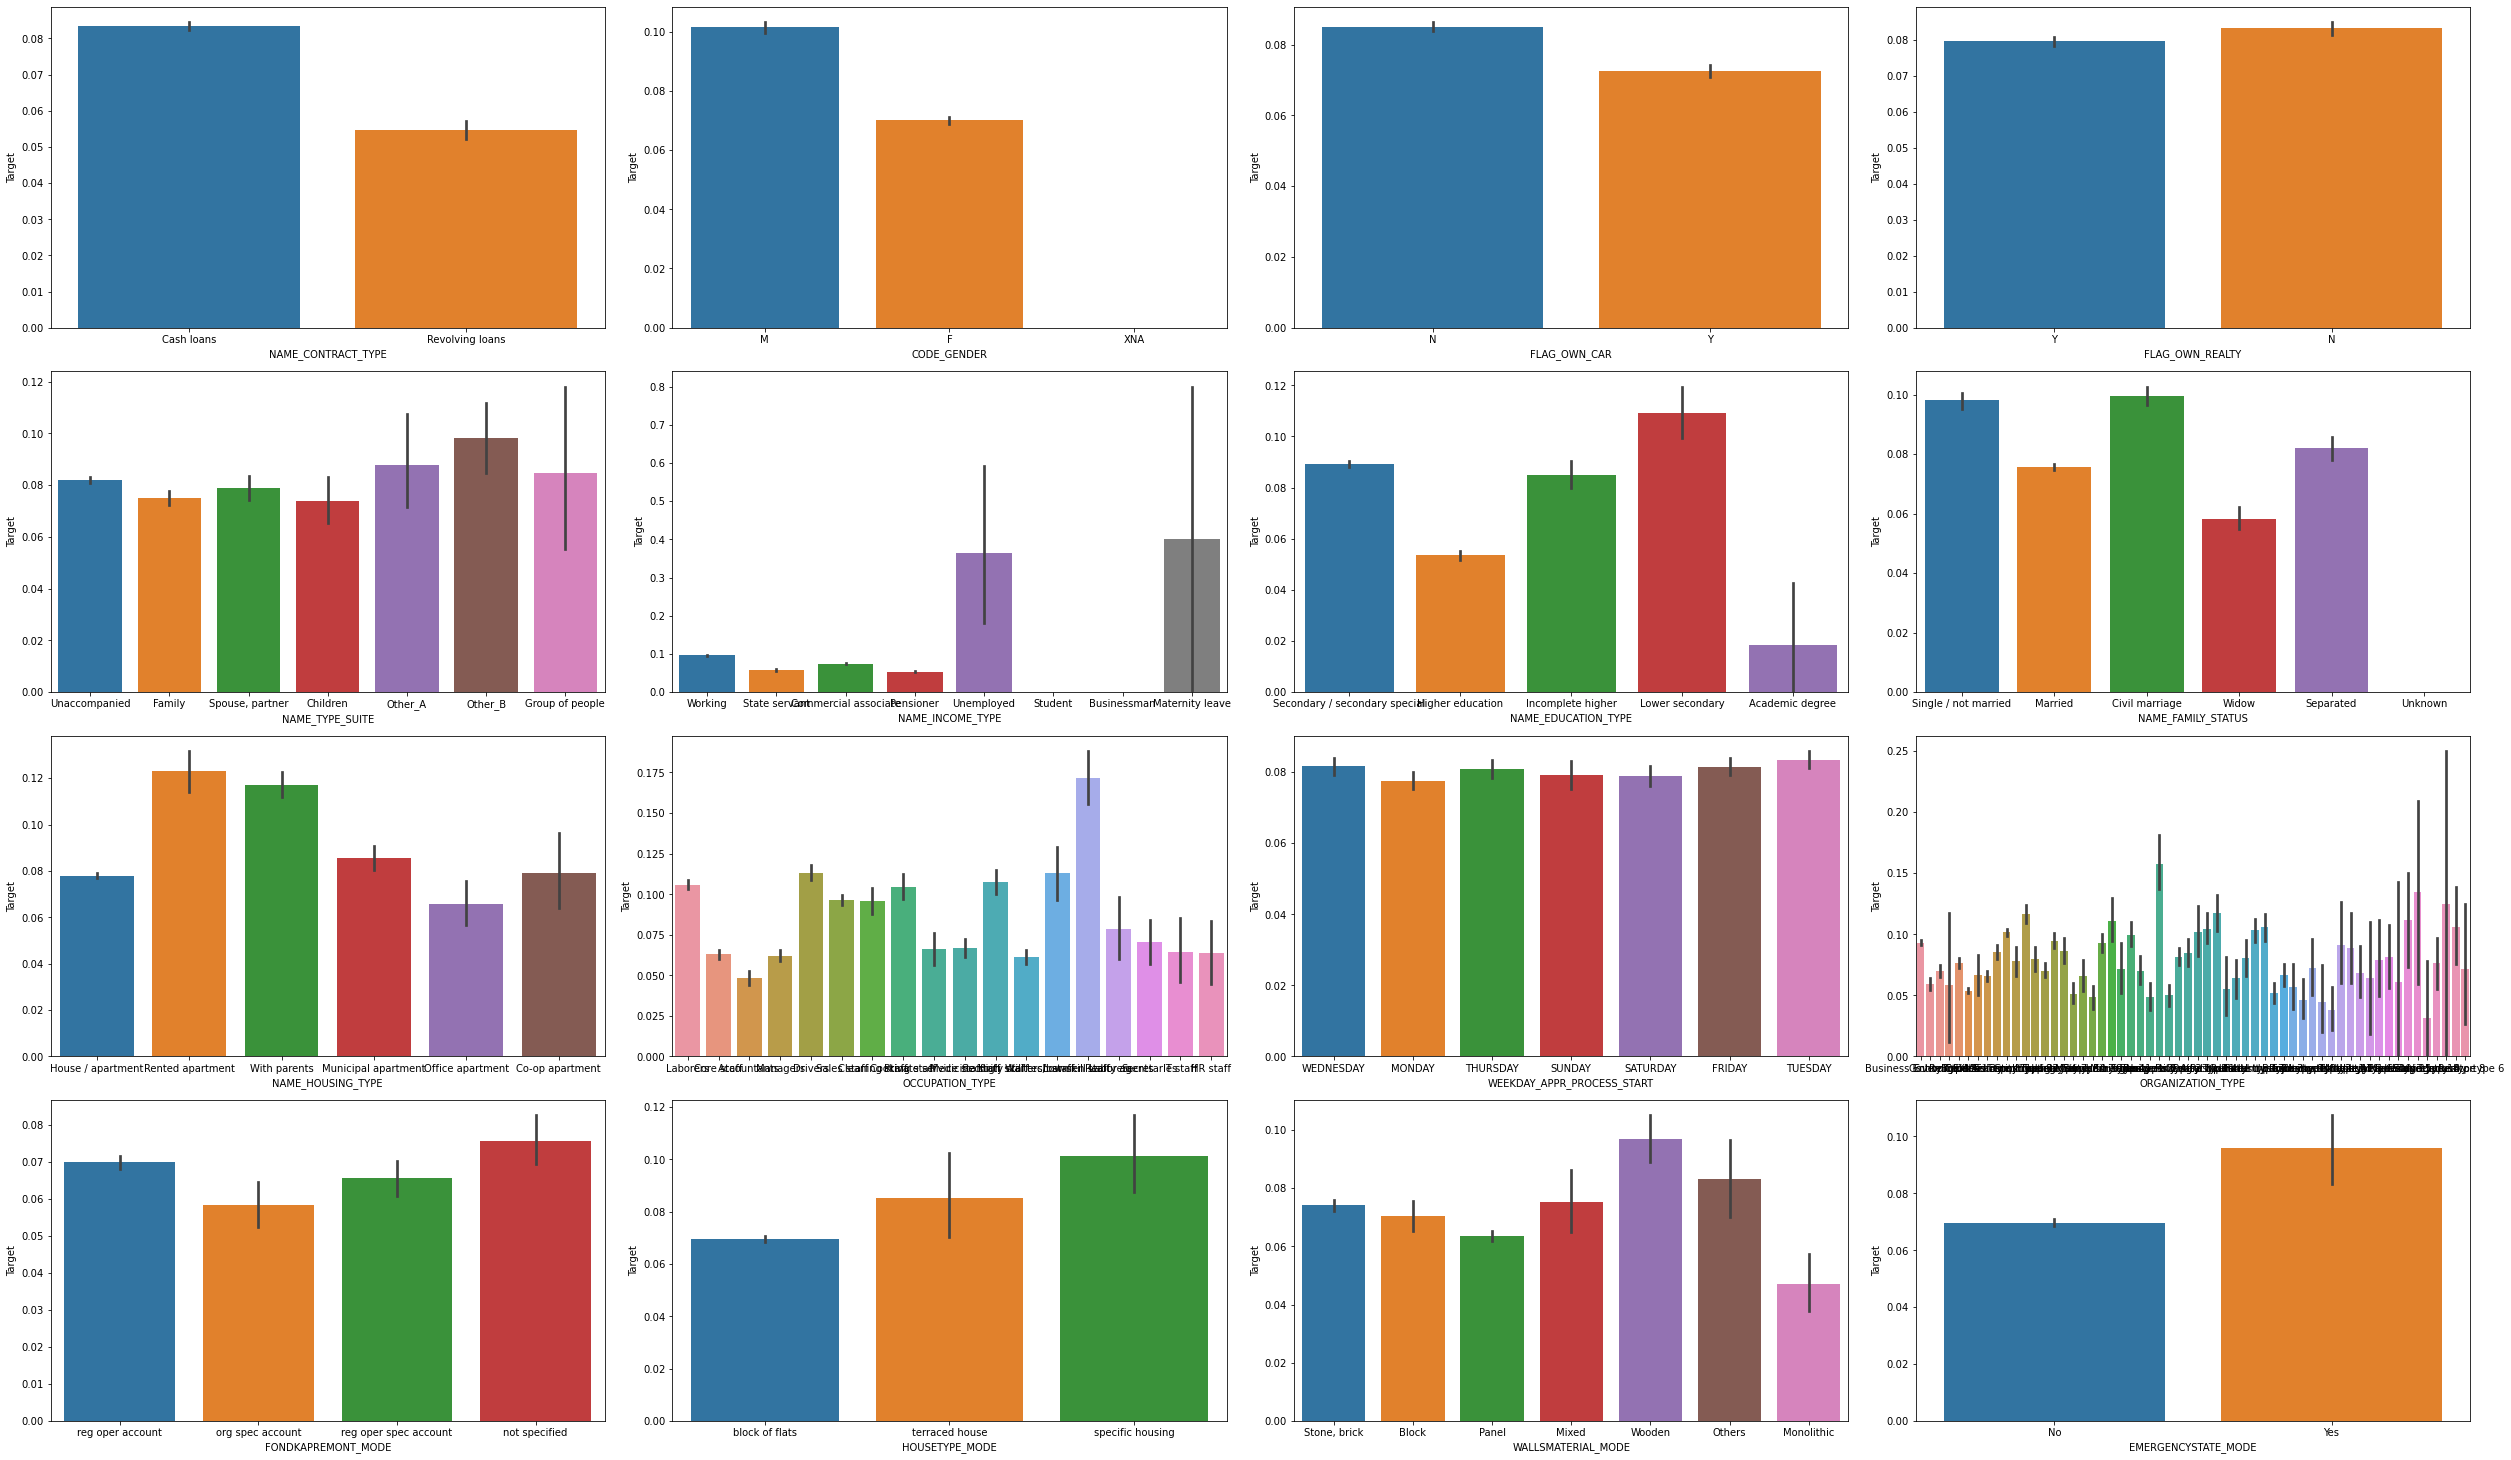

In [6]:
plt.figure(figsize=(35,25))
plotno=1
for feature in app_cat:
    if plotno<=20:
        ax=plt.subplot(5,4,plotno)
        sns.barplot(x=app[feature],y=app.TARGET)
        plt.xlabel(feature)
        plt.ylabel("Target")
    plotno+=1
plt.tight_layout() 

In [13]:
app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

##### EDA on numerical features for current applications

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

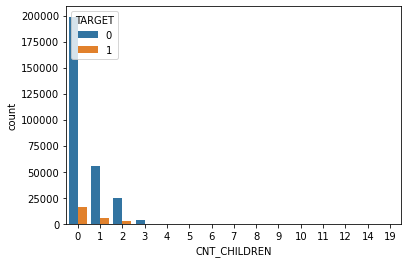

In [14]:
sns.countplot(app.CNT_CHILDREN,hue=app.TARGET)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

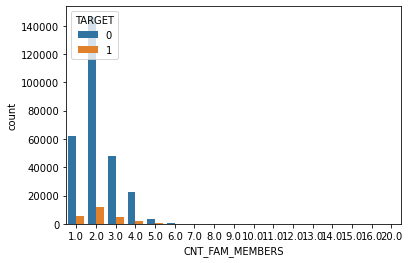

In [15]:
sns.countplot(app.CNT_FAM_MEMBERS,hue=app.TARGET)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='CNT_CHILDREN'>

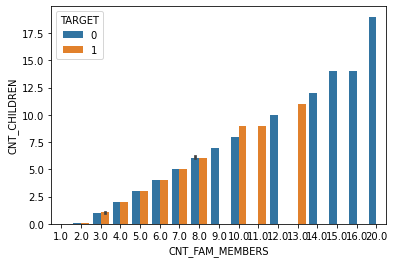

In [16]:
sns.barplot(x=app.CNT_FAM_MEMBERS,y=app.CNT_CHILDREN,hue=app.TARGET)

In [17]:
app.drop("CNT_CHILDREN",axis=1,inplace=True)

FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',

In [3]:
start_doc1=app.columns.get_loc("FLAG_DOCUMENT_2")
end_doc1=app.columns.get_loc("FLAG_DOCUMENT_21")

doc1=app.iloc[:,start_doc1:end_doc1+1]

In [14]:
app.FLAG_DOCUMENT_2.value_counts()

0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64

<AxesSubplot:ylabel='Count'>

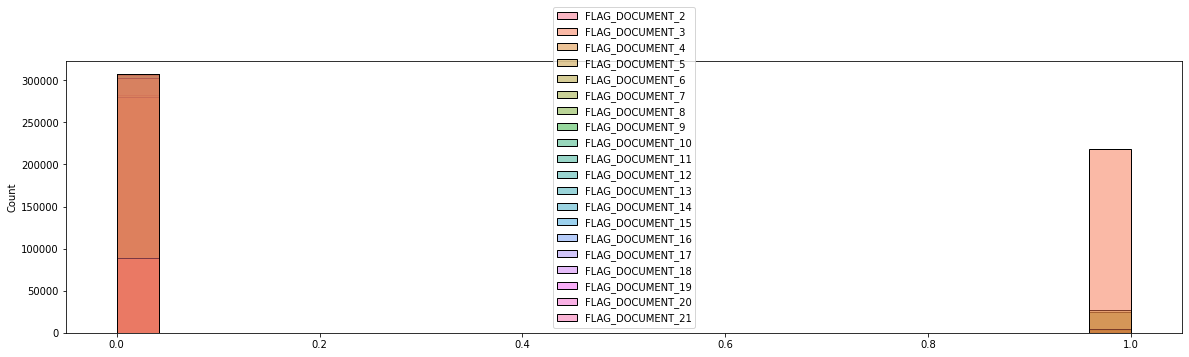

In [23]:
plt.figure(figsize=(20,5))
sns.histplot(doc1)

(array([[3.07498e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.30000e+01],
        [8.91710e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.18340e+05],
        [3.07486e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.50000e+01],
        [3.02863e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.64800e+03],
        [2.80433e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.70780e+04],
        [3.07452e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.90000e+01],
        [2.82487e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+0

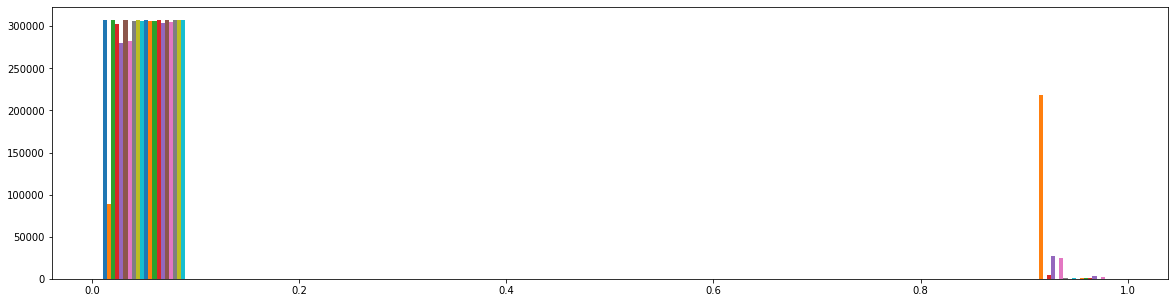

In [25]:
plt.figure(figsize=(20,5))
plt.hist(doc1)

<AxesSubplot:>

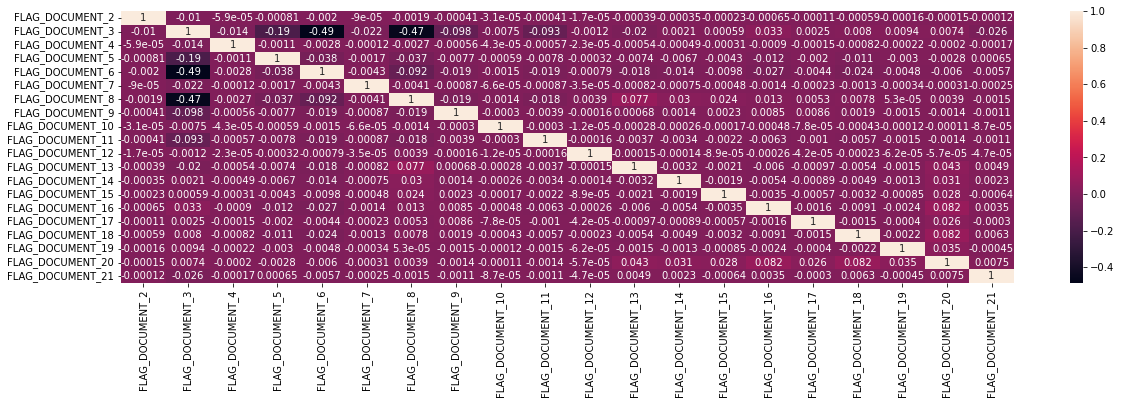

In [19]:
plt.figure(figsize=(20,5))
sns.heatmap(doc1.corr(),annot=True)

DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'

In [20]:
start_days=app.columns.get_loc("DAYS_BIRTH")
end_days=app.columns.get_loc("DAYS_ID_PUBLISH")

birth=(app.iloc[:,start_days:end_days+1])

<AxesSubplot:>

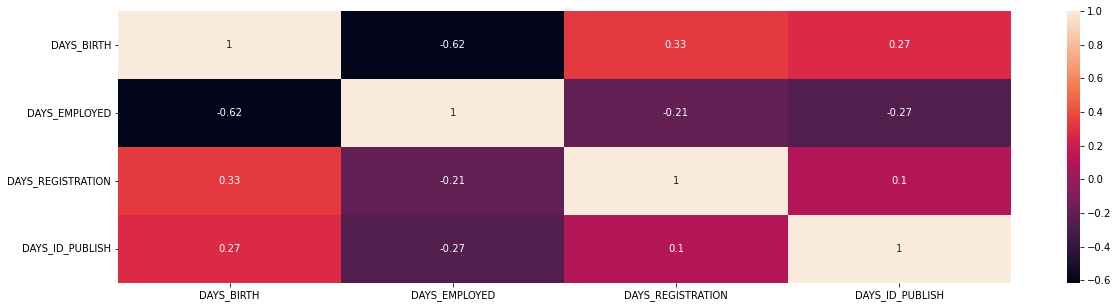

In [21]:
plt.figure(figsize=(20,5))
sns.heatmap(birth.corr(),annot=True)

In [22]:
app["Age"] = app.DAYS_BIRTH//(-365.25) 

In [23]:
app.drop("DAYS_BIRTH", inplace=True, axis=1)

#### Region:
'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REGION_POPULATION_RELATIVE'

In [24]:
start_re=app.columns.get_loc("REG_REGION_NOT_LIVE_REGION")
end_re=app.columns.get_loc("LIVE_CITY_NOT_WORK_CITY")



df_reg=app.iloc[:,start_re:end_re+1]
df_reg["REGION_POPULATION_RELATIVE"]=app["REGION_POPULATION_RELATIVE"]
df_reg["REGION_RATING_CLIENT"]=app["REGION_RATING_CLIENT"]
df_reg["REGION_RATING_CLIENT_W_CITY"]=app["REGION_RATING_CLIENT_W_CITY"]


<AxesSubplot:>

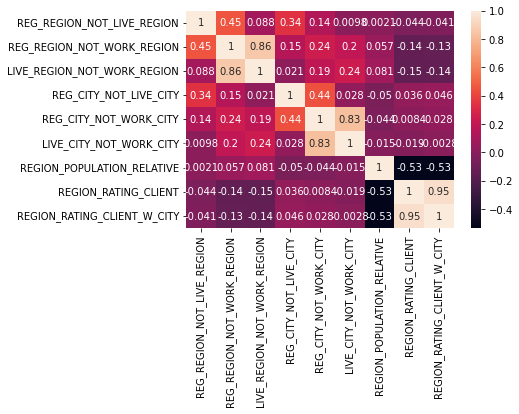

In [25]:
sns.heatmap(df_reg.corr(),annot=True)

In [26]:
curr.drop("REGION_RATING_CLIENT_W_CITY",axis=1,inplace=True)

#### Contacts:
'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL

In [27]:
start=app.columns.get_loc("FLAG_MOBIL")
end=app.columns.get_loc("FLAG_EMAIL")

df_con=app.iloc[:,start:end+1]

<AxesSubplot:>

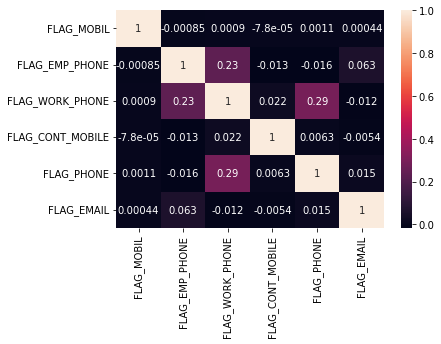

In [28]:
sns.heatmap(df_con.corr(),annot=True)

<AxesSubplot:xlabel='FLAG_MOBIL', ylabel='FLAG_CONT_MOBILE'>

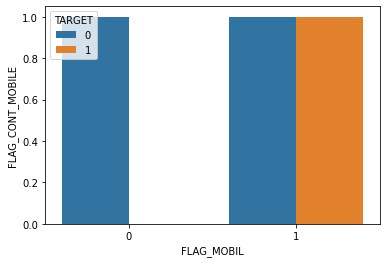

In [29]:
sns.barplot(x=app.FLAG_MOBIL,y=app.FLAG_CONT_MOBILE,hue=app.TARGET)

<AxesSubplot:xlabel='FLAG_MOBIL', ylabel='FLAG_EMP_PHONE'>

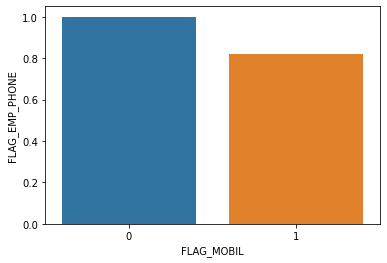

In [30]:
sns.barplot(x=app.FLAG_MOBIL,y=app.FLAG_EMP_PHONE)

<AxesSubplot:xlabel='FLAG_MOBIL', ylabel='FLAG_WORK_PHONE'>

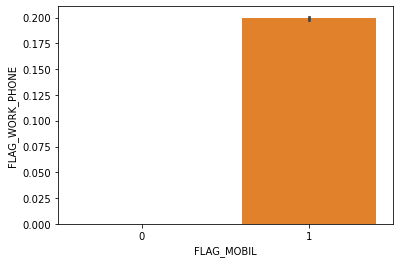

In [31]:
sns.barplot(x=app.FLAG_MOBIL,y=app.FLAG_WORK_PHONE)

<AxesSubplot:xlabel='FLAG_MOBIL', ylabel='FLAG_EMAIL'>

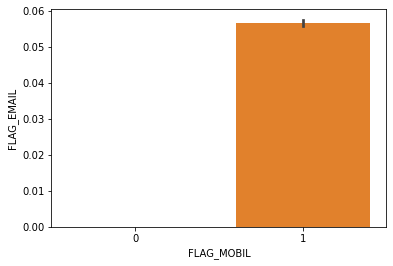

In [32]:
sns.barplot(x=app.FLAG_MOBIL,y=app.FLAG_EMAIL)

In [33]:
starte=app.columns.get_loc("EXT_SOURCE_1")
ende=app.columns.get_loc("EXT_SOURCE_3")

ext=app.iloc[:,starte:ende+1]

<AxesSubplot:>

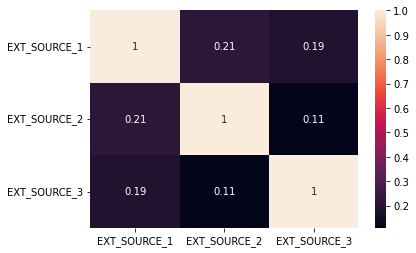

In [34]:
sns.heatmap(ext.corr(),annot=True)

OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE

In [35]:
starts=app.columns.get_loc("OBS_30_CNT_SOCIAL_CIRCLE")
ends=app.columns.get_loc("DEF_60_CNT_SOCIAL_CIRCLE")

social=app.iloc[:,starts:ends+1]

<AxesSubplot:>

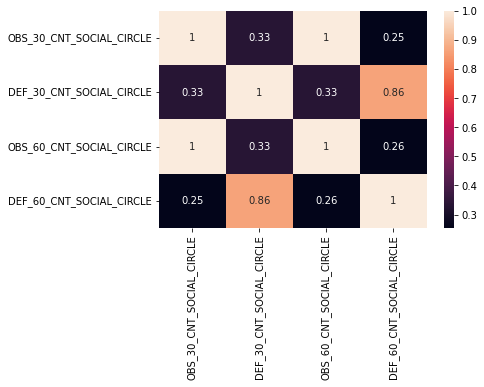

In [36]:
sns.heatmap(social.corr(),annot=True)

In [37]:
app.drop("OBS_30_CNT_SOCIAL_CIRCLE",axis=1,inplace=True)

AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR

In [38]:
startbu=app.columns.get_loc("AMT_REQ_CREDIT_BUREAU_HOUR")
endbu=app.columns.get_loc("AMT_REQ_CREDIT_BUREAU_YEAR")


bu=app.iloc[:,startbu:endbu+1]

<AxesSubplot:>

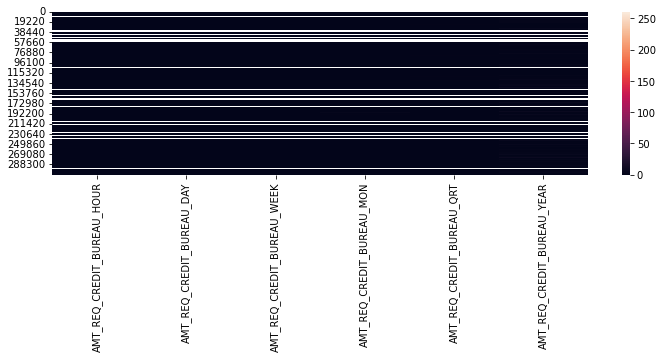

In [39]:
plt.figure(figsize=(12,3))
sns.heatmap(bu)

<AxesSubplot:>

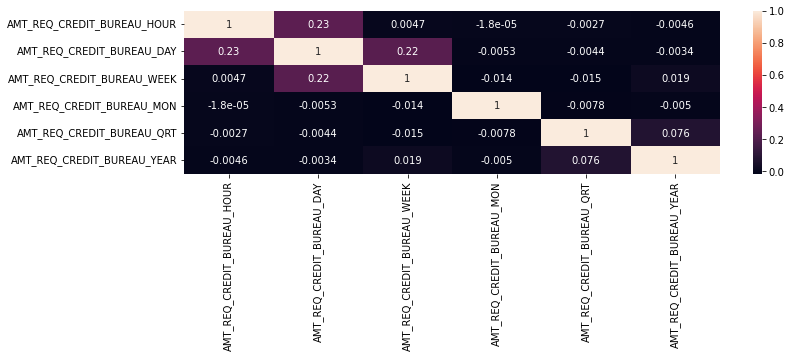

In [40]:
plt.figure(figsize=(12,3))
sns.heatmap(bu.corr(),annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '31.0'),
  

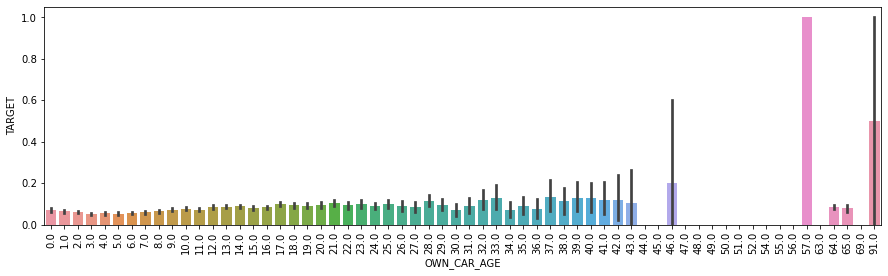

In [41]:
plt.figure(figsize=(15,4))
sns.barplot(x="OWN_CAR_AGE",y="TARGET",data=app)
plt.xticks(rotation=90)

plt.figure(figsize=(100,105),facecolor="white")
plotno=1
for feature in app_num:
    if plotno<110:
        ax=plt.subplot(11,10,plotno)
        sns.boxplot(x=feature,data=app)
        plt.xlabel(feature,fontsize=40)
    plotno+=1
plt.show()

## Insights of current application data:

#### Categorical features:

- Working has the highest count. But Maternity leave and Unemployed are the ones whose loans are defaulter or not approved for loan.
- Cash loans has highest count. Cash loans have more defaulters than revolving loan. (Revolving Loan- A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations. Examples of revolving credit include credit cards)
- Females has most counts for applying loan. Males are more defaulters compared to female applicants.
- House/Apartment has highest counts. Applicants living in rented house and with parents having more defaulters and office appartments are more non defaulters.
- Block of flats has most counts. Specific housing are most defaulters than block of flats.
- Unaccompanied has highest counts. In name type suite mostly are of same levels but other B has more defaulters whereas family and children has less defaulters.
- Applicants having car applied for mopre loans. defaulters are those who doesn't have car.
- Secondary / secondary special most counts. The applicants who have lower education like lower secondary have more defaulters than with academic degree which have less defaulters.
-  The day for approaching loans are of same level are almost of same count.
- Panels have highest count but Applicants having house made of wooden have more defaulters whereas applicants with monolithic(formed of a single large block of stone) have less dafaulters.
- Who have realty have highest counts but who have no realty has more defaulters but they are almost on same level.
- Married people applied for more loans. We can see in family applicants who are single or done civil marriage are high defaulters than widow and then married.
- reg oper account has highest counts. Applicants having no specific account or having operational account ( Operating Account means a demand deposit account maintained at the Funding Bank in Borrower's name and designated for funding that portion of each Eligible Loan not funded by a Warehousing Advance made against that Eligible Loan and for returning any excess payment from an Investor for a Pledged Loan) have more defaulters than organization account ( An organization account is an account that is owned and managed by multiple Ona users.)
- Labourers applied for more loan. People with low skill labourers has highest defaulters, then drivers, labourers,cooking staff, Security staffs , waiters are followed and applicatns who are accountants, high skill tech, IT staff, HR staff are less dafaulters.
- Business Entity Type 3 applied for most loans. Organiszation having transport type 3 has highest defaulters followed by industry type 13 and type 8. less defaulters in organization in industry type 3 and trade type 4.
- People who don't have emergency in the state applied for more loans. Applicants having emergency state mode has more defaulters than who don't have.
- People owing no car has more owning realty.

#### Numerical features:

- Applicants with 0 children are more defaulters and members with 2 also are more defaulters and both have the most count.
- In document 3 only datas are given otherwise almost all datas are near to 0 in heatmap. So most of the applicants are provided with document 3 and flag documents contains 0 and 1 so we can drop except doc 3.
- In 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' not so much datas are applied by applicants.
- In regions too most data are not provided by applicants.
- In contacts- FLAG_MOBIL has all datas.
- external source 1 has defaulters count between (0.1-0.3), external source 2 ( almost constant little varies high in 0.6), external source 3 (constant).
- In social circle no such datas are provided by applicants.
- In amount required credit bureau all datas provided are constant.
- Applicants who own car 57,91 years are the most defaulters and the highest count for car own age is 7 yrs.
- Hours between 9 am to 4pm most of the applicants loans are approached.
- In family members and children there is a uptrend and same with the defaulters i.e. as the family members increases defaulters increases so we can drop one of the column. 

### Handling null values

In [42]:
app.isnull().sum().sort_values(ascending=False)

COMMONAREA_MODE                214865
COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
Age                                 0
Length: 119, dtype: int64

In [43]:
for col in app.columns:
    print(col,app[col].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELEVATORS_AVG 163891
ENTRANCES_AVG 154828
FLOORSMAX_AVG 15302

OWN_CAR_AGE 200912,OCCUPATION_TYPE 95435,EXT_SOURCE_1 171652,EXT_SOURCE_3 60251,APARTMENTS_AVG 154677,BASEMENTAREA_AVG 178332,YEARS_BEGINEXPLUATATION_AVG 148686 YEARS_BUILD_AVG 202604 COMMONAREA_AVG 212870 ELEVATORS_AVG 162459 ENTRANCES_AVG 153468 FLOORSMAX_AVG 151677 FLOORSMIN_AVG 206726 LANDAREA_AVG 180937 LIVINGAPARTMENTS_AVG 208259 LIVINGAREA_AVG 152985 NONLIVINGAPARTMENTS_AVG 211544 NONLIVINGAREA_AVG 168187 APARTMENTS_MODE 154677 BASEMENTAREA_MODE 178332 YEARS_BEGINEXPLUATATION_MODE 148686 YEARS_BUILD_MODE 202604 COMMONAREA_MODE 212870 ELEVATORS_MODE 162459 ENTRANCES_MODE 153468 FLOORSMAX_MODE 151677 FLOORSMIN_MODE 206726 LANDAREA_MODE 180937 LIVINGAPARTMENTS_MODE 208259 LIVINGAREA_MODE 152985 NONLIVINGAPARTMENTS_MODE 211544 NONLIVINGAREA_MODE 168187 APARTMENTS_MEDI 154677 BASEMENTAREA_MEDI 178332 YEARS_BEGINEXPLUATATION_MEDI 148686 YEARS_BUILD_MEDI 202604 COMMONAREA_MEDI 212870 ELEVATORS_MEDI 162459 ENTRANCES_MEDI 153468 FLOORSMAX_MEDI 151677 FLOORSMIN_MEDI 206726 LANDAREA_MEDI 180937 LIVINGAPARTMENTS_MEDI 208259 LIVINGAREA_MEDI 152985 NONLIVINGAPARTMENTS_MEDI 211544 NONLIVINGAREA_MEDI 168187 FONDKAPREMONT_MODE 208352 HOUSETYPE_MODE 152937 TOTALAREA_MODE 147132 WALLSMATERIAL_MODE 154978 EMERGENCYSTATE_MODE 144475, AMT_REQ_CREDIT_BUREAU_HOUR 41108 AMT_REQ_CREDIT_BUREAU_DAY 41108 AMT_REQ_CREDIT_BUREAU_WEEK 41108 AMT_REQ_CREDIT_BUREAU_MON 41108 AMT_REQ_CREDIT_BUREAU_QRT 41108 AMT_REQ_CREDIT_BUREAU_YEAR 41108, AMT_ANNUITY, "AMT_GOODS_PRICE", "NAME_TYPE_SUITE","CNT_FAM_MEMBERS","EXT_SOURCE_2","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"

#### Current Appplications missing values conclusions:-
- AMT_ANNUITY 12
- AMT_GOODS_PRICE 278
- NAME_TYPE_SUITE 1292
- CNT_FAM_MEMBERS 2
- EXT_SOURCE_2 660
- OBS_30_CNT_SOCIAL_CIRCLE 1021
- DEF_30_CNT_SOCIAL_CIRCLE 1021
- OBS_60_CNT_SOCIAL_CIRCLE 1021
- DEF_60_CNT_SOCIAL_CIRCLE 1021
- DAYS_LAST_PHONE_CHANGE 1

In [44]:
app.dropna(subset=["AMT_ANNUITY",
"AMT_GOODS_PRICE",
"NAME_TYPE_SUITE",
"CNT_FAM_MEMBERS",
"EXT_SOURCE_2",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"DAYS_LAST_PHONE_CHANGE"],inplace=True)

In [45]:
for col in app.columns:
    print(col,app[col].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 0
AMT_GOODS_PRICE 0
NAME_TYPE_SUITE 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 200912
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 95435
CNT_FAM_MEMBERS 0
REGION_RATING_CLIENT 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 171652
EXT_SOURCE_2 0
EXT_SOURCE_3 60251
APARTMENTS_AVG 154677
BASEMENTAREA_AVG 178332
YEARS_BEGINEXPLUATATION_AVG 148686
YEARS_BUILD_AVG 202604
COMMONAREA_AVG 212870
ELEVATORS_AVG 162459
ENTRANCES_AVG 153468
FLOORSMAX_AVG 151677
FLOORS

##### Housing Details:-
'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',

In [46]:
start_h=app.columns.get_loc("APARTMENTS_AVG")
end_h=app.columns.get_loc("TOTALAREA_MODE")

df_house=app.iloc[:,start_h:end_h+1]
df_house["TARGET"]=app["TARGET"]
df_house["NAME_HOUSING_TYPE"]=app["NAME_HOUSING_TYPE"]

In [47]:
start_hou=df_house.columns.get_loc("APARTMENTS_AVG")
end_hou=df_house.columns.get_loc("NONLIVINGAREA_MEDI")

house_df=df_house.iloc[:,start_hou:end_hou+1]

<AxesSubplot:>

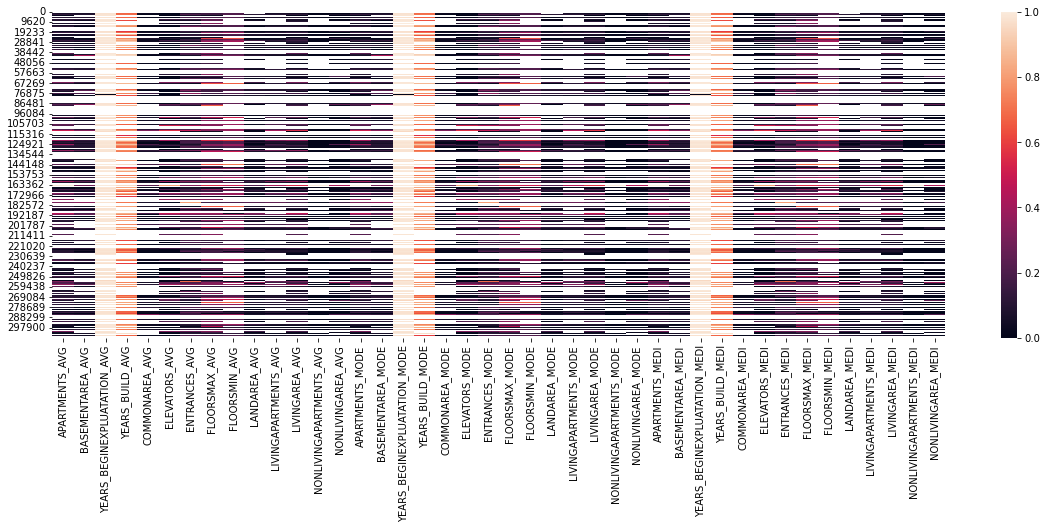

In [48]:
plt.figure(figsize=(20,6))
sns.heatmap(house_df)

<AxesSubplot:>

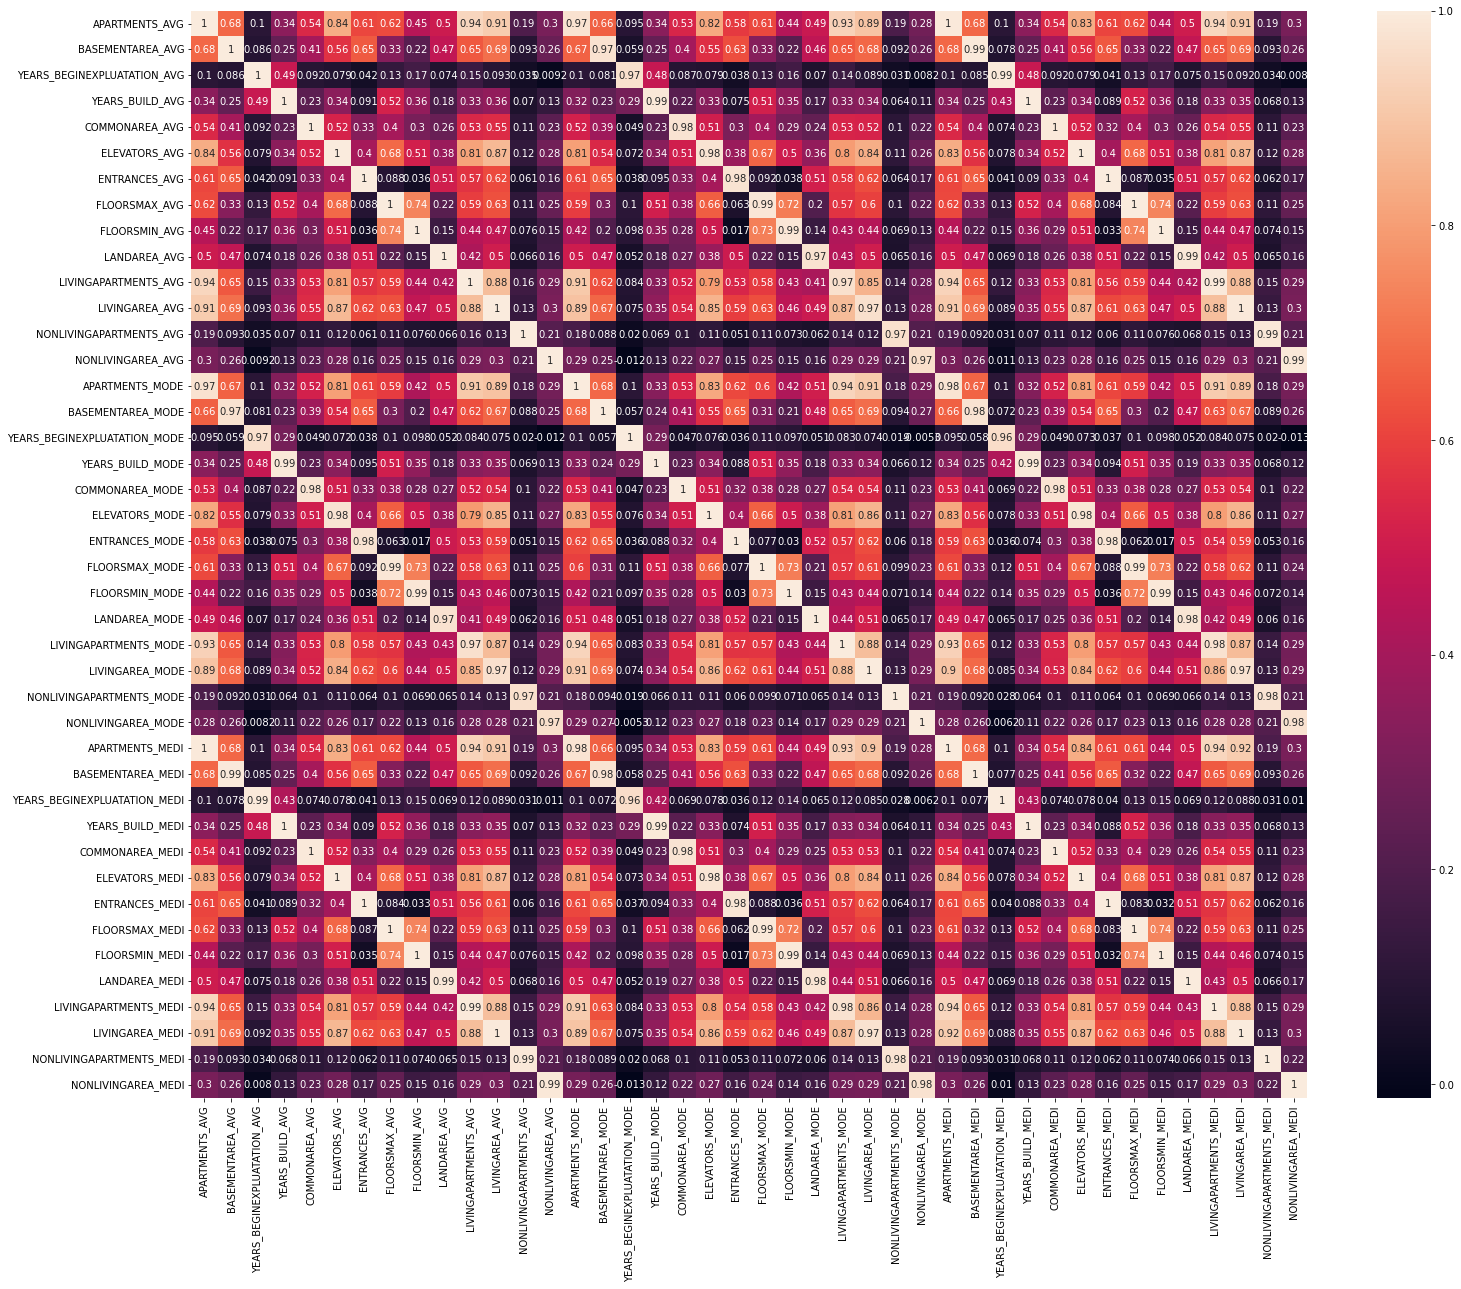

In [49]:
plt.figure(figsize=(25,20))
sns.heatmap(house_df.corr(),annot=True)

As all are correlated we can drop these features.

In [50]:
app.drop(['BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE'],axis=1,inplace=True)

In [53]:
app["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(app["AMT_REQ_CREDIT_BUREAU_HOUR"].median(),inplace=True)
app["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(app["AMT_REQ_CREDIT_BUREAU_DAY"].median(),inplace=True)
app["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(app["AMT_REQ_CREDIT_BUREAU_WEEK"].median(),inplace=True)
app["AMT_REQ_CREDIT_BUREAU_MON"].fillna(app["AMT_REQ_CREDIT_BUREAU_MON"].median(),inplace=True)
app["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(app["AMT_REQ_CREDIT_BUREAU_QRT"].median(),inplace=True)
app["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(app["AMT_REQ_CREDIT_BUREAU_YEAR"].median(),inplace=True)
app["EXT_SOURCE_3"].fillna(app["EXT_SOURCE_3"].median(),inplace=True)
app["EXT_SOURCE_1"].fillna(app["EXT_SOURCE_1"].median(),inplace=True)
app["OWN_CAR_AGE"].fillna(app["OWN_CAR_AGE"].median(),inplace=True)
app["APARTMENTS_AVG"].fillna(app["APARTMENTS_AVG"].median(),inplace=True)

In [54]:
app["FONDKAPREMONT_MODE"].fillna(app["FONDKAPREMONT_MODE"].mode()[0],inplace=True)
app["HOUSETYPE_MODE"].fillna(app["HOUSETYPE_MODE"].mode()[0],inplace=True)
app["WALLSMATERIAL_MODE"].fillna(app["WALLSMATERIAL_MODE"].mode()[0],inplace=True)
app["EMERGENCYSTATE_MODE"].fillna(app["EMERGENCYSTATE_MODE"].mode()[0],inplace=True)
app["OCCUPATION_TYPE"].fillna(app["OCCUPATION_TYPE"].mode()[0],inplace=True)

In [55]:
for col in app.columns:
    print(col,app[col].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 0
AMT_GOODS_PRICE 0
NAME_TYPE_SUITE 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 0
CNT_FAM_MEMBERS 0
REGION_RATING_CLIENT 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 0
EXT_SOURCE_2 0
EXT_SOURCE_3 0
APARTMENTS_AVG 0
FONDKAPREMONT_MODE 0
HOUSETYPE_MODE 0
WALLSMATERIAL_MODE 0
EMERGENCYSTATE_MODE 0
DEF_30_CNT_SOCIAL_CIRCLE 0
OBS_60_CNT_SOCIAL_CIRCLE 0
DEF_60_CNT_SOCIAL_CIRCLE 0
DAYS_LAST_PHONE_CHANGE 0
FLAG_DOCU

### Handling Categorical Features

In [56]:
app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         276613
Revolving loans     27918
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

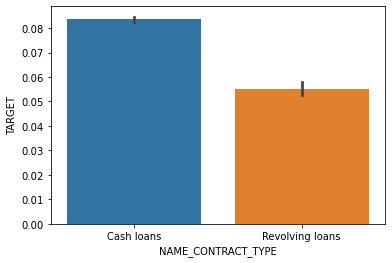

In [57]:
sns.barplot(x="NAME_CONTRACT_TYPE",y="TARGET",data=app)

In [58]:
app.NAME_CONTRACT_TYPE=app.NAME_CONTRACT_TYPE.map({"Cash loans":1,"Revolving loans":0})

In [59]:
app.CODE_GENDER.value_counts()

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64

<AxesSubplot:xlabel='CODE_GENDER', ylabel='TARGET'>

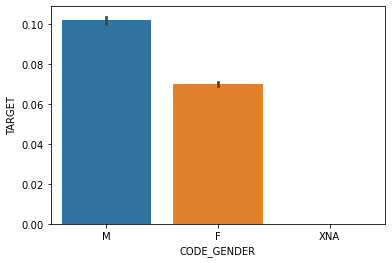

In [60]:
sns.barplot(x="CODE_GENDER",y="TARGET",data=app)

In [61]:
app.CODE_GENDER=app.CODE_GENDER.map({"F":1,"M":2,"XNA":0})

In [62]:
app.FLAG_OWN_CAR.value_counts()

N    200910
Y    103621
Name: FLAG_OWN_CAR, dtype: int64

<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='TARGET'>

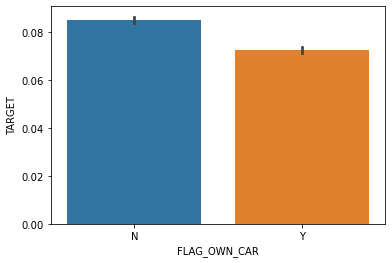

In [63]:
sns.barplot(x="FLAG_OWN_CAR",y="TARGET",data=app)

In [64]:
app.FLAG_OWN_CAR=app.FLAG_OWN_CAR.map({"N":1,"Y":0})

In [65]:
app.FLAG_OWN_REALTY.value_counts()

Y    211641
N     92890
Name: FLAG_OWN_REALTY, dtype: int64

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='TARGET'>

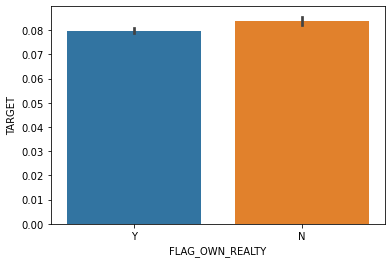

In [66]:
sns.barplot(x="FLAG_OWN_REALTY",y="TARGET",data=app)

In [67]:
app.FLAG_OWN_REALTY=app.FLAG_OWN_REALTY.map({"N":1,"Y":0})

In [68]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      247112
Family              39969
Spouse, partner     11313
Children             3249
Other_B              1757
Other_A               864
Group of people       267
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='TARGET'>

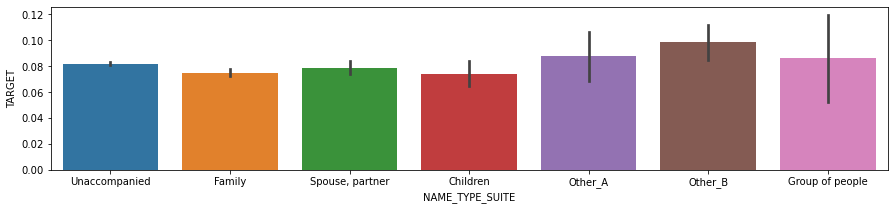

In [69]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_TYPE_SUITE",y="TARGET",data=app)

In [70]:
app.NAME_TYPE_SUITE=app.NAME_TYPE_SUITE.map({"Children":0,"Family":1,"Spouse, partner":2,
                                            "Unaccompanied":3,"Group of people":4,"Other_A":5,
                                            "Other_B":6})

In [71]:
app.NAME_INCOME_TYPE.value_counts()

Working                 157341
Commercial associate     70794
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='TARGET'>

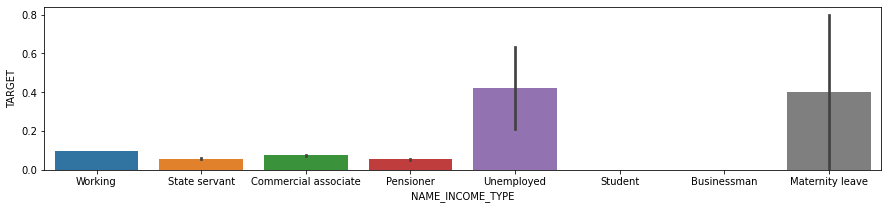

In [72]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_INCOME_TYPE",y="TARGET",data=app)

In [73]:
app.NAME_INCOME_TYPE=app.NAME_INCOME_TYPE.map({"Student":0,"Businessman":1,"Pensioner":2,
                                               "State servant":3,"Commercial associate":4,
                                               "Working":5,"Unemployed":6,"Maternity leave":7})

In [74]:
app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    216582
Higher education                  73821
Incomplete higher                 10175
Lower secondary                    3790
Academic degree                     163
Name: NAME_EDUCATION_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='TARGET'>

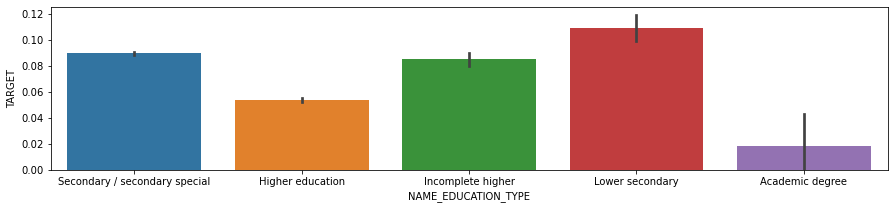

In [75]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_EDUCATION_TYPE",y="TARGET",data=app)

In [76]:
app.NAME_EDUCATION_TYPE=app.NAME_EDUCATION_TYPE.map({"Academic degree":0,"Higher education":1,
                                                     "Incomplete higher":3,"Secondary / secondary special":2,
                                                     "Lower secondary":4})

In [77]:
app.NAME_FAMILY_STATUS.value_counts()

Married                 194660
Single / not married     44876
Civil marriage           29482
Separated                19588
Widow                    15925
Name: NAME_FAMILY_STATUS, dtype: int64

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='TARGET'>

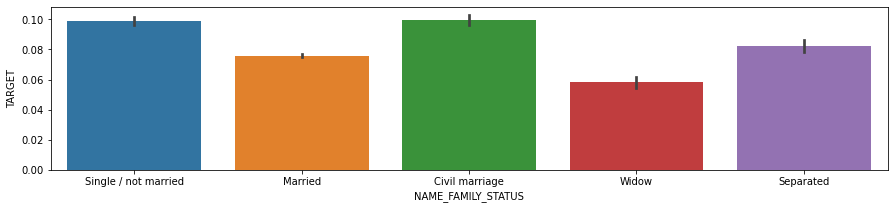

In [78]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_FAMILY_STATUS",y="TARGET",data=app)

In [79]:
app.NAME_FAMILY_STATUS=app.NAME_FAMILY_STATUS.map({"Unknown":0,"Widow":1,
                                                     "Married":2,"Separated":3,
                                                     "Single / not married":4,"Civil marriage":5})

In [80]:
app.NAME_HOUSING_TYPE.value_counts()

House / apartment      270243
With parents            14693
Municipal apartment     11079
Rented apartment         4829
Office apartment         2583
Co-op apartment          1104
Name: NAME_HOUSING_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='TARGET'>

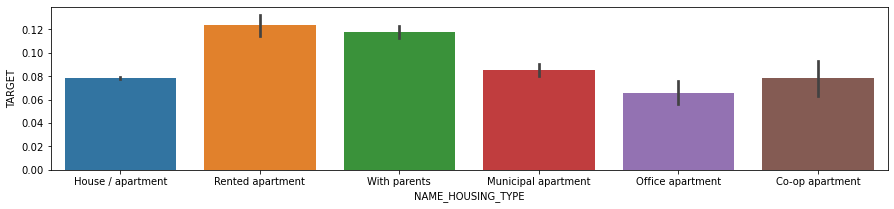

In [81]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_HOUSING_TYPE",y="TARGET",data=app)

In [82]:
app.NAME_HOUSING_TYPE=app.NAME_HOUSING_TYPE.map({"Office apartment":0,"House / apartment":1,
                                                   "Co-op apartment":2,"Municipal apartment":3,
                                                   "With parents":4,"Rented apartment":5})

In [83]:
app.OCCUPATION_TYPE.value_counts()

Laborers                 150165
Sales staff               31790
Core staff                27263
Managers                  21114
Drivers                   18456
High skill tech staff     11261
Accountants                9698
Medicine staff             8459
Security staff             6667
Cooking staff              5898
Cleaning staff             4615
Private service staff      2629
Low-skill Laborers         2077
Waiters/barmen staff       1335
Secretaries                1293
Realty agents               742
HR staff                    558
IT staff                    511
Name: OCCUPATION_TYPE, dtype: int64

In [84]:
occupation=pd.get_dummies(app.OCCUPATION_TYPE,drop_first=True)
occupation

,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
307507,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
307508,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
307509,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [85]:
app.drop("OCCUPATION_TYPE",axis=1,inplace=True)

In [86]:
app.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53399
WEDNESDAY    51418
MONDAY       50263
THURSDAY     50082
FRIDAY       49833
SATURDAY     33505
SUNDAY       16031
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

<AxesSubplot:xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='TARGET'>

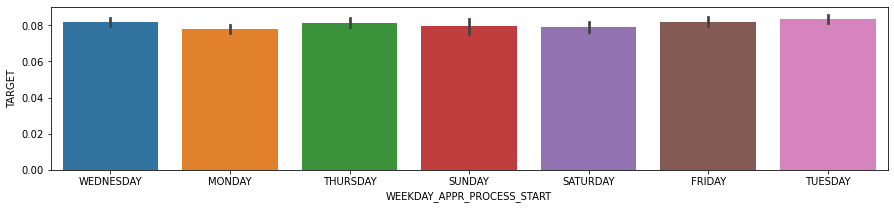

In [87]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="TARGET",data=app)

In [88]:
app.WEEKDAY_APPR_PROCESS_START=app.WEEKDAY_APPR_PROCESS_START.map({"MONDAY":0,"SATURDAY":1,
                                                   "TUESDAY":6,"WEDNESDAY":5,"THURSDAY":4,
                                                                  "FRIDAY":3,"SUNDAY":2})

In [89]:
app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67270
XNA                       54852
Self-employed             38048
Other                     16546
Medicine                  11078
Business Entity Type 2    10458
Government                10308
School                     8823
Trade: type 7              7769
Kindergarten               6823
Construction               6659
Business Entity Type 1     5919
Transport: type 4          5353
Trade: type 3              3443
Industry: type 9           3328
Industry: type 3           3254
Security                   3215
Housing                    2935
Industry: type 11          2685
Military                   2610
Bank                       2455
Agriculture                2436
Police                     2319
Transport: type 2          2184
Postal                     2137
Security Ministries        1953
Trade: type 2              1871
Restaurant                 1794
Services                   1561
University                 1311
Industry: type 7           1295
Transpor

In [90]:
#from sklearn import preprocessing

In [91]:
#label_encoder = preprocessing.LabelEncoder()

In [92]:
#app['ORGANIZATION_TYPE']= label_encoder.fit_transform(app['ORGANIZATION_TYPE'])

In [93]:
#app['OCCUPATION_TYPE']= label_encoder.fit_transform(app['OCCUPATION_TYPE'])

In [94]:
organization=pd.get_dummies(app.ORGANIZATION_TYPE,drop_first=True)
organization

,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,...,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,XNA
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
307508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
app.drop("ORGANIZATION_TYPE",axis=1,inplace=True)

In [96]:
app.FONDKAPREMONT_MODE.value_counts()

reg oper account         281384
reg oper spec account     11965
not specified              5621
org spec account           5561
Name: FONDKAPREMONT_MODE, dtype: int64

<AxesSubplot:xlabel='FONDKAPREMONT_MODE', ylabel='TARGET'>

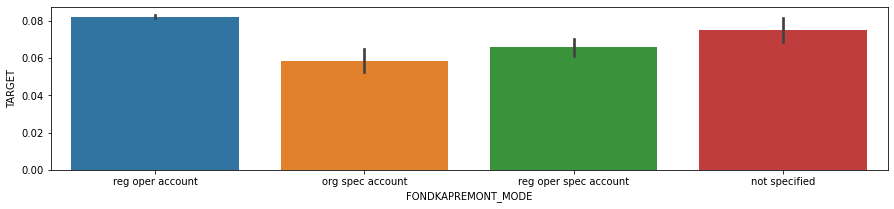

In [97]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="FONDKAPREMONT_MODE",y="TARGET",data=app)

In [98]:
app.FONDKAPREMONT_MODE=app.FONDKAPREMONT_MODE.map({"org spec account":0,"reg oper spec account":1,
                                                   "reg oper account":2,"not specified":3})

In [99]:
app.HOUSETYPE_MODE.value_counts()

block of flats      301845
specific housing      1485
terraced house        1201
Name: HOUSETYPE_MODE, dtype: int64

<AxesSubplot:xlabel='HOUSETYPE_MODE', ylabel='TARGET'>

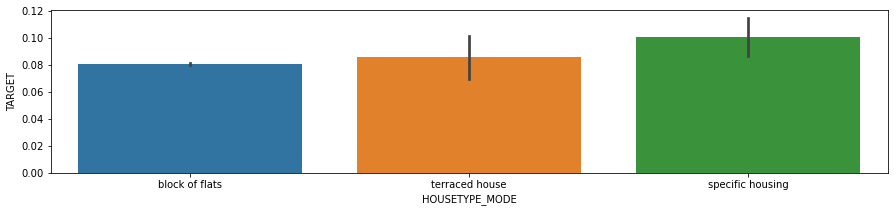

In [100]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="HOUSETYPE_MODE",y="TARGET",data=app)

In [101]:
app.HOUSETYPE_MODE=app.HOUSETYPE_MODE.map({"block of flats":0,"terraced house":1,
                                           "specific housing":2})

In [102]:
app.WALLSMATERIAL_MODE.value_counts()

Panel           220321
Stone, brick     64114
Block             9146
Wooden            5322
Mixed             2274
Monolithic        1750
Others            1604
Name: WALLSMATERIAL_MODE, dtype: int64

<AxesSubplot:xlabel='WALLSMATERIAL_MODE', ylabel='TARGET'>

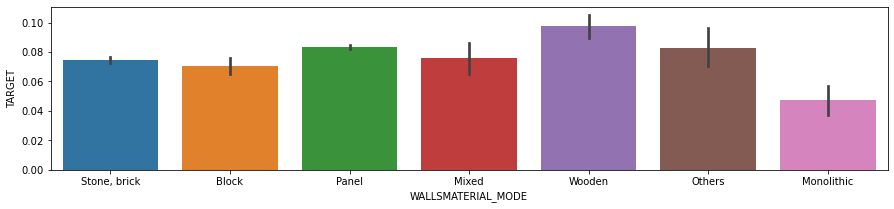

In [103]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="WALLSMATERIAL_MODE",y="TARGET",data=app)

In [104]:
app.WALLSMATERIAL_MODE=app.WALLSMATERIAL_MODE.map({"Monolithic":0,"Panel":1,
                                                   "Block":2,"Stone, brick":3,
                                                   "Mixed":4,"Others":5,"Wooden":6})

In [105]:
app.EMERGENCYSTATE_MODE.value_counts()

No     302219
Yes      2312
Name: EMERGENCYSTATE_MODE, dtype: int64

<AxesSubplot:xlabel='EMERGENCYSTATE_MODE', ylabel='TARGET'>

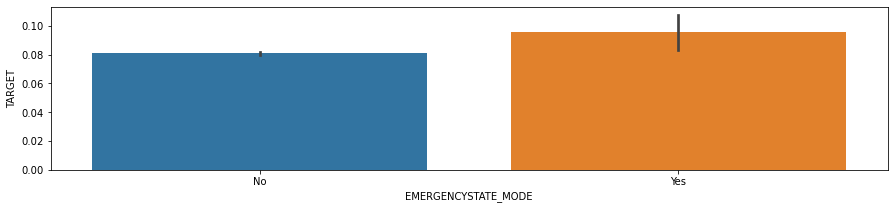

In [106]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="EMERGENCYSTATE_MODE",y="TARGET",data=app)

In [107]:
app.EMERGENCYSTATE_MODE=app.EMERGENCYSTATE_MODE.map({"No":0,"Yes":1})

In [108]:
home_curr=pd.concat([app,organization,occupation],axis=1)

# Previous Applications

In [122]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("-"*90)
print("Loading the deatials....")
print("-"*90)
print(f"The shape of Previous Applications: {prev.shape}")
print("-"*90)
print(f"Number of duplicated files are: {prev.shape[0]-prev.duplicated().shape[0]}")
print("-"*90)   

------------------------------------------------------------------------------------------
Loading the deatials....
------------------------------------------------------------------------------------------
The shape of Previous Applications: (1670214, 37)
------------------------------------------------------------------------------------------
Number of duplicated files are: 0
------------------------------------------------------------------------------------------


In [124]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [125]:
additional=[]
common=[]
for i in app.columns:
    if i not in prev.columns:
        additional.append(i)
    else:
        common.append(i)
    
print(len(additional))
print(len(common))
print(common)

67
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


In [126]:
for col in prev.columns:
    print(col,prev[col].isnull().sum())

SK_ID_PREV 0
SK_ID_CURR 0
NAME_CONTRACT_TYPE 0
AMT_ANNUITY 372235
AMT_APPLICATION 0
AMT_CREDIT 1
AMT_DOWN_PAYMENT 895844
AMT_GOODS_PRICE 385515
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
FLAG_LAST_APPL_PER_CONTRACT 0
NFLAG_LAST_APPL_IN_DAY 0
RATE_DOWN_PAYMENT 895844
RATE_INTEREST_PRIMARY 1664263
RATE_INTEREST_PRIVILEGED 1664263
NAME_CASH_LOAN_PURPOSE 0
NAME_CONTRACT_STATUS 0
DAYS_DECISION 0
NAME_PAYMENT_TYPE 0
CODE_REJECT_REASON 0
NAME_TYPE_SUITE 820405
NAME_CLIENT_TYPE 0
NAME_GOODS_CATEGORY 0
NAME_PORTFOLIO 0
NAME_PRODUCT_TYPE 0
CHANNEL_TYPE 0
SELLERPLACE_AREA 0
NAME_SELLER_INDUSTRY 0
CNT_PAYMENT 372230
NAME_YIELD_GROUP 0
PRODUCT_COMBINATION 346
DAYS_FIRST_DRAWING 673065
DAYS_FIRST_DUE 673065
DAYS_LAST_DUE_1ST_VERSION 673065
DAYS_LAST_DUE 673065
DAYS_TERMINATION 673065
NFLAG_INSURED_ON_APPROVAL 673065


In [127]:
num_prev_app=[feature for feature in prev.columns if prev[feature].dtype!="O"]
len(num_prev_app)

21

In [128]:
cat_prev_app=[feature for feature in prev.columns if prev[feature].dtype=="O"]
len(cat_prev_app)

16

## EDA for Previous Applications

In [77]:
prevm=pd.merge(app[["SK_ID_CURR","TARGET"]],prev,how="left",on=["SK_ID_CURR"])

In [130]:
prevm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420747 entries, 0 to 1420746
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1420747 non-null  int64  
 1   TARGET                       1420747 non-null  int64  
 2   SK_ID_PREV                   1405123 non-null  float64
 3   NAME_CONTRACT_TYPE           1405123 non-null  object 
 4   AMT_ANNUITY                  1099650 non-null  float64
 5   AMT_APPLICATION              1405123 non-null  float64
 6   AMT_CREDIT                   1405122 non-null  float64
 7   AMT_DOWN_PAYMENT             659627 non-null   float64
 8   AMT_GOODS_PRICE              1087343 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   1405123 non-null  object 
 10  HOUR_APPR_PROCESS_START      1405123 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  1405123 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1405123 non-n

In [78]:
prevm[prevm["NAME_CONTRACT_STATUS"]=="Refused"].count()

SK_ID_CURR                     245390
TARGET                         245390
SK_ID_PREV                     245390
NAME_CONTRACT_TYPE             245390
AMT_ANNUITY                    210848
AMT_APPLICATION                245390
AMT_CREDIT                     245390
AMT_DOWN_PAYMENT                74778
AMT_GOODS_PRICE                213868
WEEKDAY_APPR_PROCESS_START     245390
HOUR_APPR_PROCESS_START        245390
FLAG_LAST_APPL_PER_CONTRACT    245390
NFLAG_LAST_APPL_IN_DAY         245390
RATE_DOWN_PAYMENT               74778
RATE_INTEREST_PRIMARY               0
RATE_INTEREST_PRIVILEGED            0
NAME_CASH_LOAN_PURPOSE         245390
NAME_CONTRACT_STATUS           245390
DAYS_DECISION                  245390
NAME_PAYMENT_TYPE              245390
CODE_REJECT_REASON             245390
NAME_TYPE_SUITE                141116
NAME_CLIENT_TYPE               245390
NAME_GOODS_CATEGORY            245390
NAME_PORTFOLIO                 245390
NAME_PRODUCT_TYPE              245390
CHANNEL_TYPE

In [81]:
total_approved=prevm[prevm["NAME_CONTRACT_STATUS"]=="Approved"].shape[0]
approved=prevm[(prevm["TARGET"]==1) & (prevm["NAME_CONTRACT_STATUS"]=="Approved")].shape[0]
print("Percantage of applicants approved previously but are defaulter in current loan:",approved*100/total_approved)

Percantage of applicants approved previously but are defaulter in current loan: 7.588655443691958


In [82]:
total_refused=prevm[prevm["NAME_CONTRACT_STATUS"]=="Refused"].shape[0]
refused=prevm[(prevm["TARGET"]==0) & (prevm["NAME_CONTRACT_STATUS"]=="Refused")].shape[0]
print("Percantage of applicants refused previously but are non-defaulter in current loan:",refused*100/total_refused)

Percantage of applicants refused previously but are non-defaulter in current loan: 88.00358612820408


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

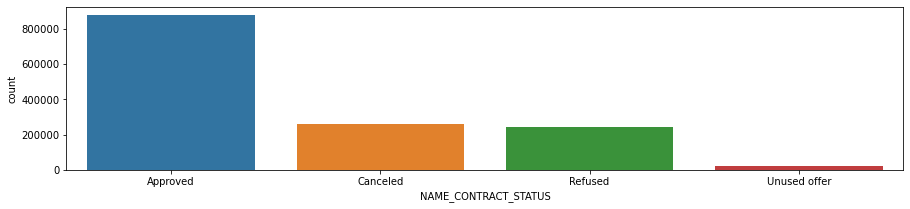

In [131]:
sns.countplot(prevm.NAME_CONTRACT_STATUS)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='TARGET'>

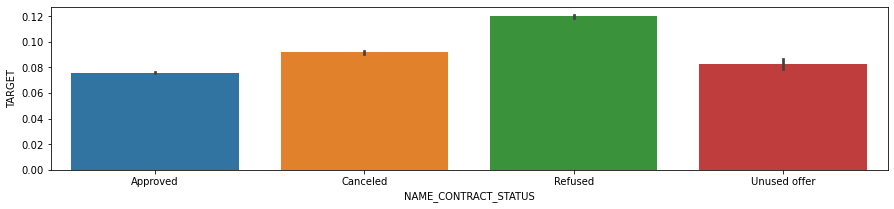

In [132]:
sns.barplot(x="NAME_CONTRACT_STATUS",y="TARGET",data=prevm)

Most applications are approved. Cancelled and Refused are almost on the same level.

target 0 - non defaulter 1- defaulter, so its obvious and the graph also shows where there is more defaulter the applications will be refused and hence cancelled is also followed after refused status.

In [133]:
prevm[prevm["NAME_CONTRACT_STATUS"]=="Refused"].count()

SK_ID_CURR                     243822
TARGET                         243822
SK_ID_PREV                     243822
NAME_CONTRACT_TYPE             243822
AMT_ANNUITY                    209511
AMT_APPLICATION                243822
AMT_CREDIT                     243822
AMT_DOWN_PAYMENT                74336
AMT_GOODS_PRICE                212580
WEEKDAY_APPR_PROCESS_START     243822
HOUR_APPR_PROCESS_START        243822
FLAG_LAST_APPL_PER_CONTRACT    243822
NFLAG_LAST_APPL_IN_DAY         243822
RATE_DOWN_PAYMENT               74336
RATE_INTEREST_PRIMARY               0
RATE_INTEREST_PRIVILEGED            0
NAME_CASH_LOAN_PURPOSE         243822
NAME_CONTRACT_STATUS           243822
DAYS_DECISION                  243822
NAME_PAYMENT_TYPE              243822
CODE_REJECT_REASON             243822
NAME_TYPE_SUITE                140324
NAME_CLIENT_TYPE               243822
NAME_GOODS_CATEGORY            243822
NAME_PORTFOLIO                 243822
NAME_PRODUCT_TYPE              243822
CHANNEL_TYPE

In [134]:
total_approved=prevm[prevm["NAME_CONTRACT_STATUS"]=="Approved"].shape[0]
approved=prevm[(prevm["TARGET"]==1) & (prevm["NAME_CONTRACT_STATUS"]=="Approved")].shape[0]
print("Percantage of applicants approved previously but are defaulter in current loan:",approved*100/total_approved)

Percantage of applicants approved previously but are defaulter in current loan: 7.600410145538078


In [135]:
total_refused=prevm[prevm["NAME_CONTRACT_STATUS"]=="Refused"].shape[0]
refused=prevm[(prevm["TARGET"]==0) & (prevm["NAME_CONTRACT_STATUS"]=="Refused")].shape[0]
print("Percantage of applicants refused previously but are non-defaulter in current loan:",refused*100/total_refused)

Percantage of applicants refused previously but are non-defaulter in current loan: 88.00354356866895


Percantage of applicants approved previously but are defaulter in current loan: 7.588655443691958
Percantage of applicants refused previously but are non-defaulter in current loan: 88.00358612820408

# Basic Insights:

- Most applications are approved. Cancelled and Refused are almost on the same level.

- (Target 0 - non defaulter, 1- defaulter) , so its obvious and the graph also shows where there is more defaulter the applications will be refused and hence cancelled is also followed after refused status.
- Percantage of applicants approved previously but are defaulter in current loan: 7.588655443691958
- Percantage of applicants refused previously but are non-defaulter in current loan: 88.00358612820408

### EDA on Categorical features for previous applications

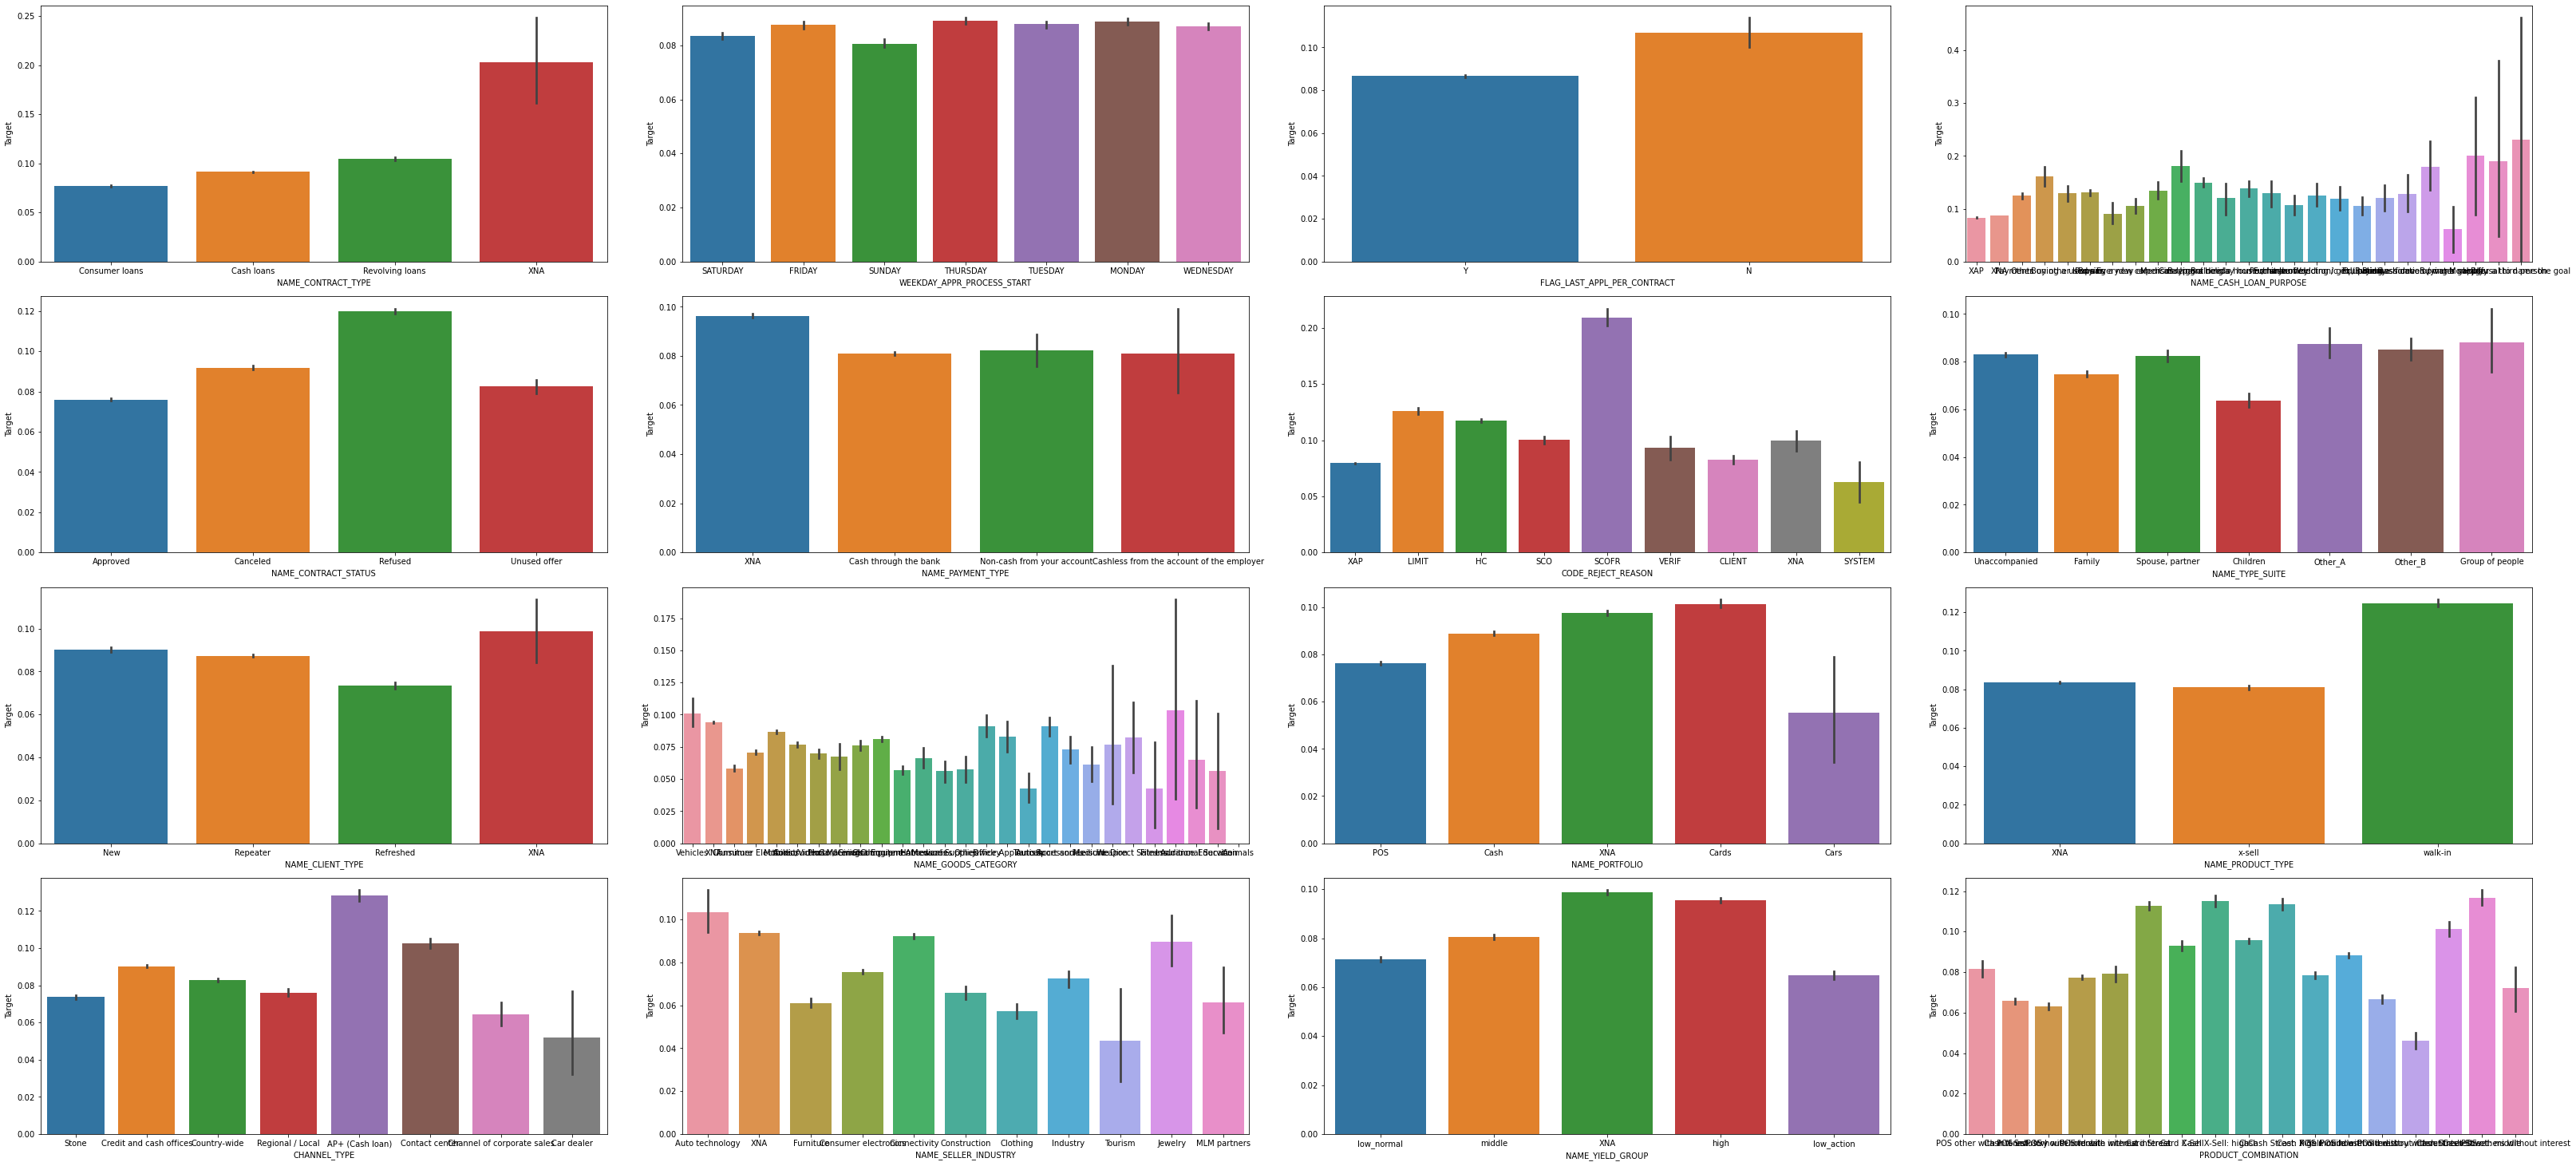

In [136]:
plt.figure(figsize=(45,25))
plotno=1
for feature in cat_prev_app:
    if plotno<=20:
        ax=plt.subplot(5,4,plotno)
        sns.barplot(x=prevm[feature],y=prevm.TARGET)
        plt.xlabel(feature)
        plt.ylabel("Target")
    plotno+=1
plt.tight_layout()

In [137]:
prevm.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 781696
XNA                                 564369
Repairs                              19974
Other                                13361
Urgent needs                          7211
Buying a used car                     2458
Building a house or an annex          2327
Everyday expenses                     2038
Medicine                              1855
Payments on other loans               1565
Education                             1328
Journey                               1036
Purchase of electronic equipment       932
Buying a new car                       881
Wedding / gift / holiday               791
Buying a home                          697
Car repairs                            686
Furniture                              656
Buying a holiday home / land           459
Business development                   358
Gasification / water supply            251
Buying a garage                        115
Hobby                                   45
Money for a

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Vehicles'),
  Text(1, 0, 'XNA'),
  Text(2, 0, 'Furniture'),
  Text(3, 0, 'Consumer Electronics'),
  Text(4, 0, 'Mobile'),
  Text(5, 0, 'Audio/Video'),
  Text(6, 0, 'Construction Materials'),
  Text(7, 0, 'Gardening'),
  Text(8, 0, 'Photo / Cinema Equipment'),
  Text(9, 0, 'Computers'),
  Text(10, 0, 'Clothing and Accessories'),
  Text(11, 0, 'Homewares'),
  Text(12, 0, 'Medical Supplies'),
  Text(13, 0, 'Other'),
  Text(14, 0, 'Jewelry'),
  Text(15, 0, 'Office Appliances'),
  Text(16, 0, 'Tourism'),
  Text(17, 0, 'Auto Accessories'),
  Text(18, 0, 'Sport and Leisure'),
  Text(19, 0, 'Medicine'),
  Text(20, 0, 'Weapon'),
  Text(21, 0, 'Direct Sales'),
  Text(22, 0, 'Fitness'),
  Text(23, 0, 'Insurance'),
  Text(24, 0, 'Additional Service'),
  Text(25, 0, 'Education'),
  Text(26, 0, 'Animals')])

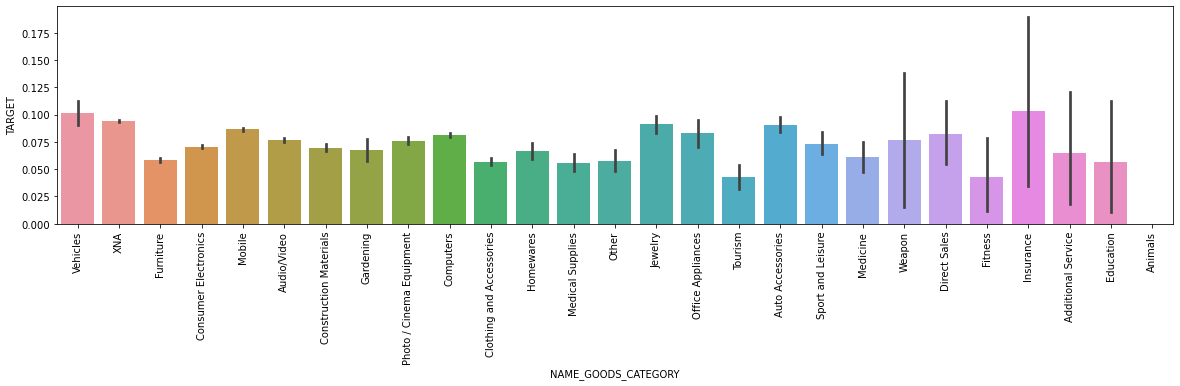

In [138]:
plt.figure(figsize=(20,4))
sns.barplot(x="NAME_GOODS_CATEGORY",y="TARGET",data=prevm)
plt.xticks(rotation="vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'POS other with interest'),
  Text(1, 0, 'Cash X-Sell: low'),
  Text(2, 0, 'POS industry with interest'),
  Text(3, 0, 'POS household with interest'),
  Text(4, 0, 'POS mobile without interest'),
  Text(5, 0, 'Card Street'),
  Text(6, 0, 'Card X-Sell'),
  Text(7, 0, 'Cash X-Sell: high'),
  Text(8, 0, 'Cash'),
  Text(9, 0, 'Cash Street: high'),
  Text(10, 0, 'Cash X-Sell: middle'),
  Text(11, 0, 'POS mobile with interest'),
  Text(12, 0, 'POS household without interest'),
  Text(13, 0, 'POS industry without interest'),
  Text(14, 0, 'Cash Street: low'),
  Text(15, 0, 'Cash Street: middle'),
  Text(16, 0, 'POS others without interest')])

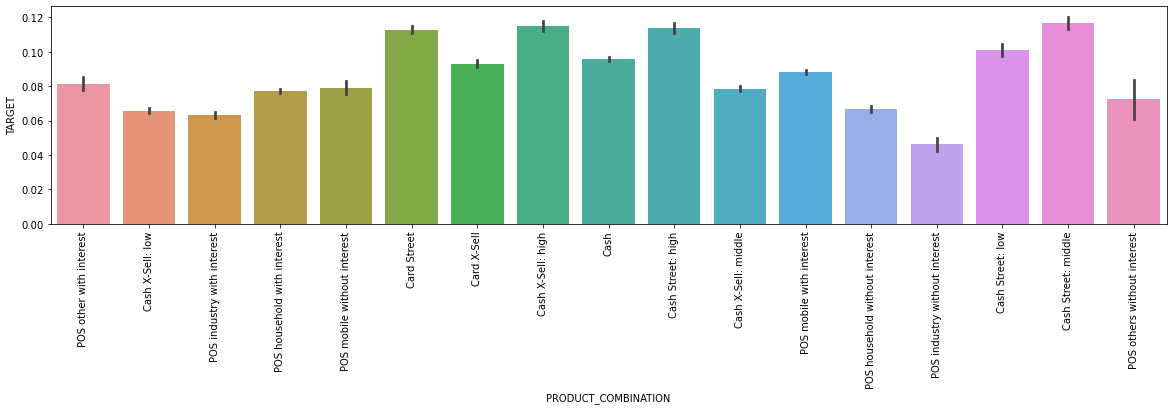

In [139]:
plt.figure(figsize=(20,4))
sns.barplot(x="PRODUCT_COMBINATION",y="TARGET",data=prevm)
plt.xticks(rotation="vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'XAP'),
  Text(1, 0, 'XNA'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Payments on other loans'),
  Text(4, 0, 'Buying a used car'),
  Text(5, 0, 'Repairs'),
  Text(6, 0, 'Buying a new car'),
  Text(7, 0, 'Everyday expenses'),
  Text(8, 0, 'Medicine'),
  Text(9, 0, 'Car repairs'),
  Text(10, 0, 'Urgent needs'),
  Text(11, 0, 'Buying a holiday home / land'),
  Text(12, 0, 'Building a house or an annex'),
  Text(13, 0, 'Furniture'),
  Text(14, 0, 'Journey'),
  Text(15, 0, 'Purchase of electronic equipment'),
  Text(16, 0, 'Wedding / gift / holiday'),
  Text(17, 0, 'Education'),
  Text(18, 0, 'Buying a home'),
  Text(19, 0, 'Business development'),
  Text(20, 0, 'Gasification / water supply'),
  Text(21, 0, 'Buying a garage'),
  Text(22, 0, 'Hobby'),
  Text(23, 0, 'Money for a third person'),
  Text(24, 0, 'Refusal to name the goal')])

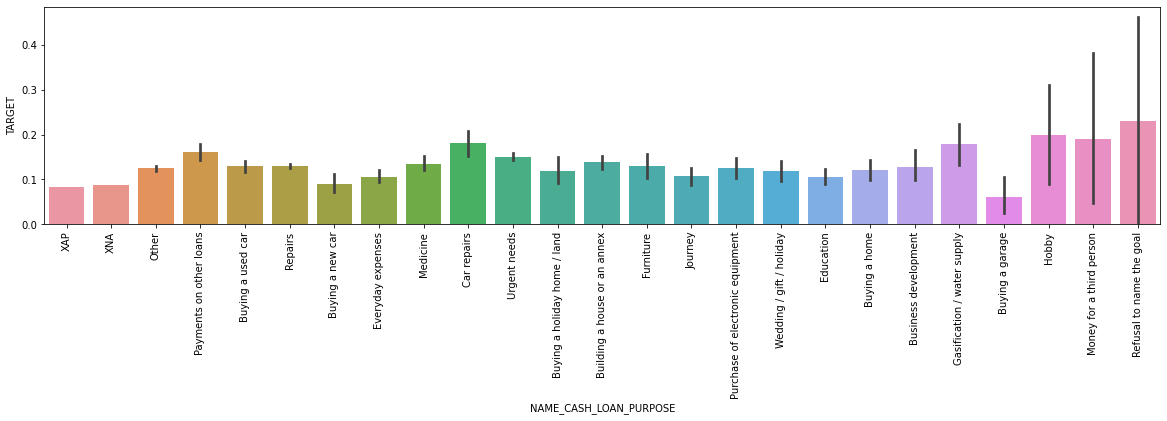

In [140]:
plt.figure(figsize=(20,4))
sns.barplot(x="NAME_CASH_LOAN_PURPOSE",y="TARGET",data=prevm)
plt.xticks(rotation="vertical")

### EDA on numerical features on previous applications

<AxesSubplot:>

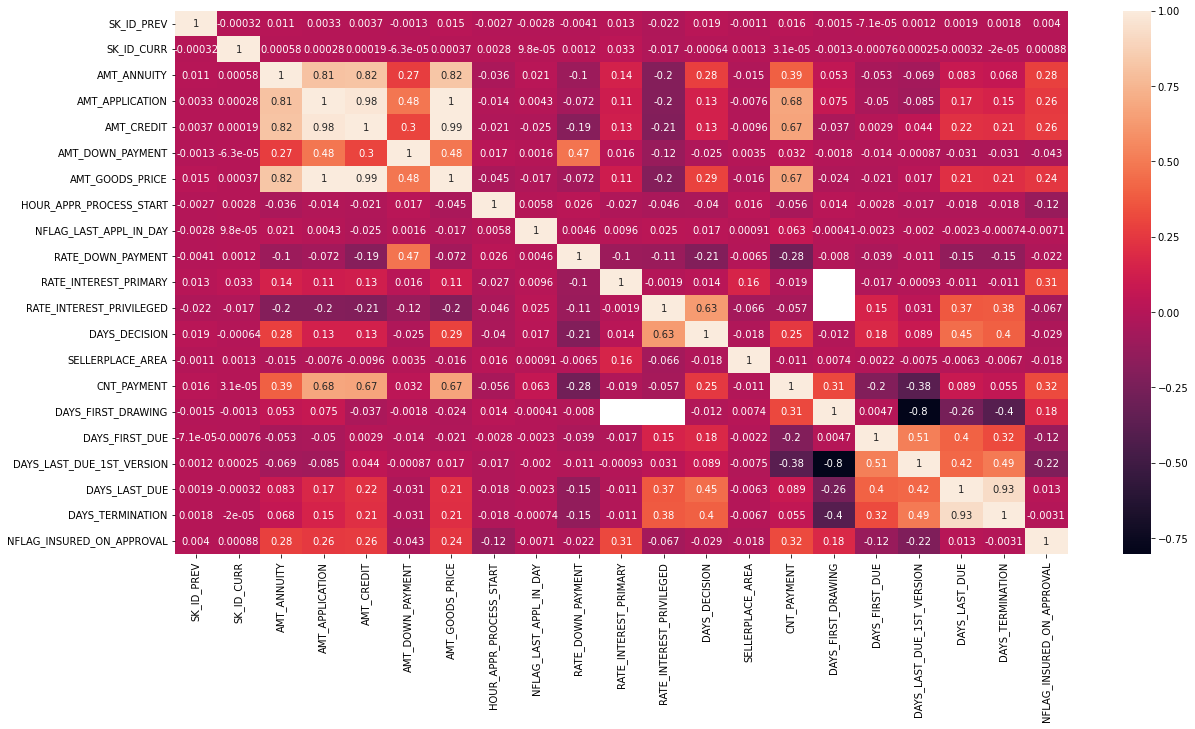

In [141]:
plt.figure(figsize=(20,10))
sns.heatmap(prev.corr(),annot=True)

In [142]:
num_prev_app

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'

In [143]:
start_amt=prevm.columns.get_loc("AMT_ANNUITY")
end_amt=prevm.columns.get_loc("AMT_GOODS_PRICE")

amt=prevm.iloc[:,start_amt:end_amt+1]

<AxesSubplot:>

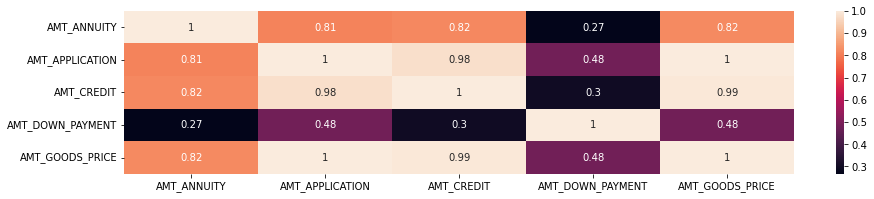

In [144]:
sns.heatmap(amt.corr(),annot=True)

We can see there is a correlation between amount application and amount credit so we can drop one of these columns, and both Amt_annuity and amt_down_payment is necesaary to work with.

In [145]:
prevm.drop("AMT_APPLICATION",axis=1,inplace=True)

DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION

In [146]:
start_d=prevm.columns.get_loc("DAYS_FIRST_DRAWING")
end_d=prevm.columns.get_loc("DAYS_TERMINATION")

d=prevm.iloc[:,start_d:end_d+1]
d["DAYS_DECISION"]=prevm["DAYS_DECISION"]

<AxesSubplot:>

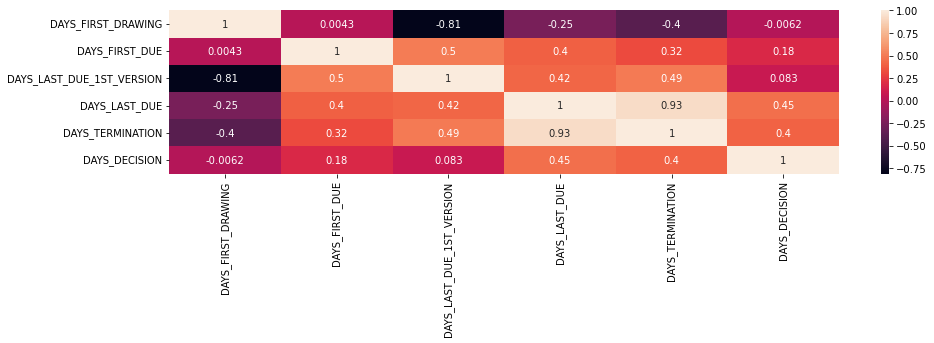

In [147]:
sns.heatmap(d.corr(),annot=True)

In [148]:
prevm.drop("DAYS_TERMINATION",axis=1,inplace=True)

RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED

In [149]:
start_rate=prevm.columns.get_loc("RATE_DOWN_PAYMENT")
end_rate=prevm.columns.get_loc("RATE_INTEREST_PRIVILEGED")

rate=prevm.iloc[:,start_rate:end_rate+1]

<AxesSubplot:>

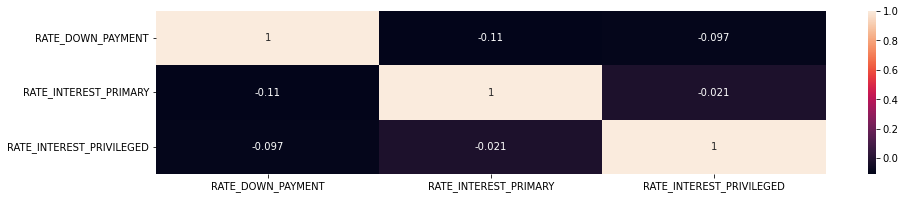

In [150]:
sns.heatmap(rate.corr(),annot=True)

<AxesSubplot:xlabel='NFLAG_LAST_APPL_IN_DAY', ylabel='NFLAG_INSURED_ON_APPROVAL'>

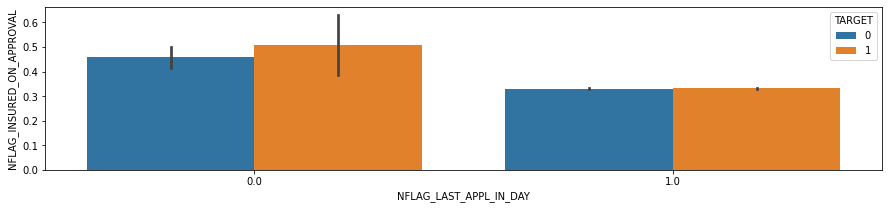

In [151]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NFLAG_LAST_APPL_IN_DAY",y="NFLAG_INSURED_ON_APPROVAL",data=prevm,hue="TARGET")

In [152]:
#sns.barplot(x=prevm.RATE_DOWN_PAYMENT,y=prevm.TARGET)

In [153]:
#sns.barplot(x=prevm.SELLERPLACE_AREA,y=prevm.TARGET)

<AxesSubplot:xlabel='HOUR_APPR_PROCESS_START', ylabel='TARGET'>

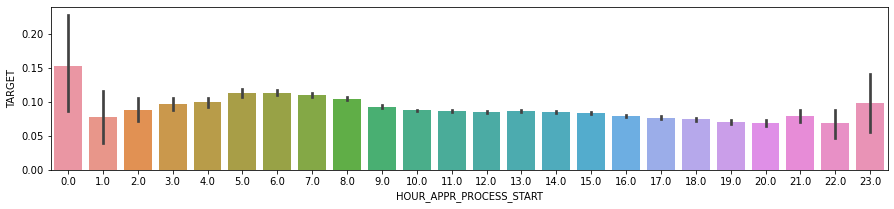

In [154]:
sns.barplot(x=prevm.HOUR_APPR_PROCESS_START,y=prevm.TARGET)

# Insights for Previous Applications:


##### Categorical features:

- Cash loans has the highest counts. But here in previous applications we see revolving loans are having more defaulters than cash loans, consumer loan (A Consumer Loan is a loan that banks offer to customers to buy household goods and appliances and even personal devices. The most common types of consumer loans are – mortgage, auto loan, education loan, personal loan, refinance loan, and credit card.) have least defaulters, and XNA (not available list) has the highest defaulters.

- Repeater has the highest count. People who are new and repeater too has high defaulters than refreshed ones  and some datas are not available.

- Days for approaching loan are of same level.

- Who were not in the last application contact are higher defaulters than the who were.

- In name suite type mostly group of people are defaulter but group B and A and spouse and partner are almost in same level and Uhnaccompanied has the highest counts.

- Purpose for loan which is having on disclosure of goal have more defaulter and for buying a garage has the least and XAP and XNA has most counts.

- Industry type like Auto technology followed by connectivity and jewellery has high defaulters and tourism has least defaulters. Consumer electronics has most counts has some datas are not available.

- Vehicles and insurance goods has high defaulters and least can be again seen in toursim and fitness. and some datas are missing and mobiles has the highest counts.

- In Payment type Cash through the bank has highest counts and almost all are in same levels except where some datas are not available.

- Credit and cash offices has most counts. In channel type Account payable+cash loans have high defaulters whereas countrywide and reginal or local are of same level and car dealer have the least.

- In name portfolio POS has the most counts and cards are high defaulters and cars are the least.

- Common reason for rejection is SCOFR. XAP has highest counts.

- In name yield group some datas are not available. Middle has most counts whereas high is the most defaulters.

- In product type walk in has the highest defaulters. As some datas are not available x-sell has most counts.

- In Product Combination Cash has the most counts and most defaulters are Card street, card street middle, cash street high, cash x sell high.

##### Numerical features:

- We can see there is a correlation between amount application and amount credit and amt goods price so we can drop one of these columns, and both Amt_annuity and amt_down_payment is necesaary to work with.

- In Amount Annuity(An annuity is a fixed amount of money that you will get each year for the rest of your life. A contract between you and an insurance company that requires the insurer to make payments to you, either immediately or in the future) are defaulter in the range from (0-18000)

- In Amount down payment most defaulters are between (0-70000)

- Application submission in a day is more and has more non defaulters.We can conclude people applied before last day has defaulters more w.r.t insured on approval and we can see people who didn't applied on last day has more approval.

- DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION mostly are non defaulters.

- Goods price between(0-5000) are mostly defaulters.

- Rate down payment (0-10000) are defaulters.

- Last application in Day and insured approched have same trend therefore can be dropped.

- In First day drawing,days_last_1st_version,Days termination and days_last_due have same trend so we can take one of them and days_last_due and days decision have same trend so we can take one of them.

In [155]:
prevm.shape

(1420747, 36)

# Null Values:

In [250]:
prevm.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
RATE_INTEREST_PRIMARY          0
RATE_INTEREST_PRIVILEGED       0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [159]:
prevm.drop("SK_ID_PREV",axis=1,inplace=True)

In [160]:
prevm["AMT_ANNUITY"].fillna(prevm["AMT_ANNUITY"].median(),inplace=True)
prevm["AMT_CREDIT"].fillna(prevm["AMT_CREDIT"].median(),inplace=True)
prevm["AMT_DOWN_PAYMENT"].fillna(prevm["AMT_DOWN_PAYMENT"].median(),inplace=True)
prevm["AMT_GOODS_PRICE"].fillna(prevm["AMT_GOODS_PRICE"].median(),inplace=True)
prevm["HOUR_APPR_PROCESS_START"].fillna(prevm["HOUR_APPR_PROCESS_START"].median(),inplace=True)
prevm["NFLAG_LAST_APPL_IN_DAY"].fillna(prevm["NFLAG_LAST_APPL_IN_DAY"].median(),inplace=True)
prevm["RATE_DOWN_PAYMENT"].fillna(prevm["RATE_DOWN_PAYMENT"].median(),inplace=True)
prevm["RATE_INTEREST_PRIMARY"].fillna(prevm["RATE_INTEREST_PRIMARY"].median(),inplace=True)
prevm["RATE_INTEREST_PRIVILEGED"].fillna(prevm["RATE_INTEREST_PRIVILEGED"].median(),inplace=True)
prevm["DAYS_DECISION"].fillna(prevm["DAYS_DECISION"].median(),inplace=True)
prevm["SELLERPLACE_AREA"].fillna(prevm["SELLERPLACE_AREA"].median(),inplace=True)
prevm["CNT_PAYMENT"].fillna(prevm["CNT_PAYMENT"].median(),inplace=True)
prevm["DAYS_FIRST_DRAWING"].fillna(prevm["DAYS_FIRST_DRAWING"].median(),inplace=True)
prevm["DAYS_FIRST_DUE"].fillna(prevm["DAYS_FIRST_DUE"].median(),inplace=True)
prevm["DAYS_LAST_DUE_1ST_VERSION"].fillna(prevm["DAYS_LAST_DUE_1ST_VERSION"].median(),inplace=True)
prevm["DAYS_LAST_DUE"].fillna(prevm["DAYS_LAST_DUE"].median(),inplace=True)
prevm["NFLAG_INSURED_ON_APPROVAL"].fillna(prevm["NFLAG_INSURED_ON_APPROVAL"].median(),inplace=True)

In [161]:
cat_prev_app

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [162]:
prevm["PRODUCT_COMBINATION"].mode()

0    Cash
dtype: object

In [163]:
prevm["NAME_CONTRACT_TYPE"].fillna(prevm["NAME_CONTRACT_TYPE"].mode()[0],inplace=True)
prevm["WEEKDAY_APPR_PROCESS_START"].fillna(prevm["WEEKDAY_APPR_PROCESS_START"].mode()[0],inplace=True)
prevm["FLAG_LAST_APPL_PER_CONTRACT"].fillna(prevm["FLAG_LAST_APPL_PER_CONTRACT"].mode()[0],inplace=True)
prevm["NAME_CASH_LOAN_PURPOSE"].fillna(prevm["NAME_CASH_LOAN_PURPOSE"].mode()[0],inplace=True)
prevm["NAME_CONTRACT_STATUS"].fillna(prevm["NAME_CONTRACT_STATUS"].mode()[0],inplace=True)
prevm["NAME_PAYMENT_TYPE"].fillna(prevm["NAME_PAYMENT_TYPE"].mode()[0],inplace=True)
prevm["CODE_REJECT_REASON"].fillna(prevm["CODE_REJECT_REASON"].mode()[0],inplace=True)
prevm["NAME_TYPE_SUITE"].fillna(prevm["NAME_TYPE_SUITE"].mode()[0],inplace=True)
prevm["NAME_CLIENT_TYPE"].fillna(prevm["NAME_CLIENT_TYPE"].mode()[0],inplace=True)
prevm["NAME_GOODS_CATEGORY"].fillna(prevm["NAME_GOODS_CATEGORY"].mode()[0],inplace=True)
prevm["NAME_PORTFOLIO"].fillna(prevm["NAME_PORTFOLIO"].mode()[0],inplace=True)
prevm["NAME_PRODUCT_TYPE"].fillna(prevm["NAME_PRODUCT_TYPE"].mode()[0],inplace=True)
prevm["CHANNEL_TYPE"].fillna(prevm["CHANNEL_TYPE"].mode()[0],inplace=True)
prevm["NAME_SELLER_INDUSTRY"].fillna(prevm["NAME_SELLER_INDUSTRY"].mode()[0],inplace=True)
prevm["NAME_YIELD_GROUP"].fillna(prevm["NAME_YIELD_GROUP"].mode()[0],inplace=True)
prevm["PRODUCT_COMBINATION"].fillna(prevm["PRODUCT_COMBINATION"].mode()[0],inplace=True)

# Handling Categorical Values

In [164]:
prevm.NAME_CONTRACT_TYPE.value_counts()

Cash loans         639051
Consumer loans     620875
Revolving loans    160511
XNA                   310
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

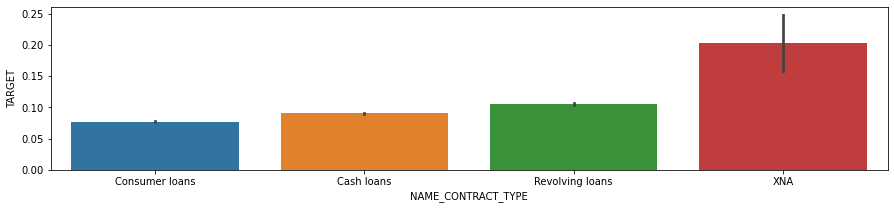

In [165]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_CONTRACT_TYPE",y="TARGET",data=prevm)

In [166]:
prevm.NAME_CONTRACT_TYPE=prevm.NAME_CONTRACT_TYPE.map({"Consumer loans":0,"Cash loans":1,
                                                      "Revolving loans":2,"XNA":3})

In [167]:
prevm.WEEKDAY_APPR_PROCESS_START.value_counts()

WEDNESDAY    229954
TUESDAY      213729
MONDAY       213316
FRIDAY       211972
THURSDAY     209731
SATURDAY     202835
SUNDAY       139210
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

<AxesSubplot:xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='TARGET'>

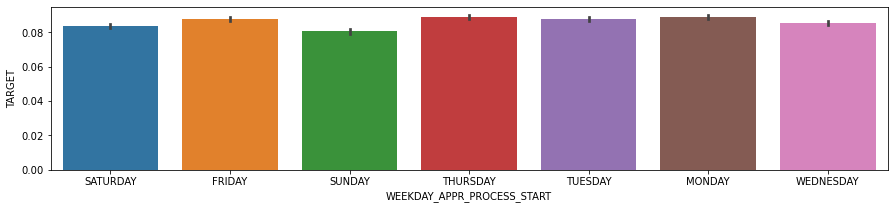

In [168]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="TARGET",data=prevm)

In [169]:
prevm.WEEKDAY_APPR_PROCESS_START=prevm.WEEKDAY_APPR_PROCESS_START.map({"SUNDAY":0,"SATURDAY":1,
                                                      "WEDNESDAY":2,"FRIDAY":3,"THURSDAY":4,
                                                                      "TUESDAY":5,"MONDAY":6})

In [170]:
prevm.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1413560
N       7187
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

<AxesSubplot:xlabel='FLAG_LAST_APPL_PER_CONTRACT', ylabel='TARGET'>

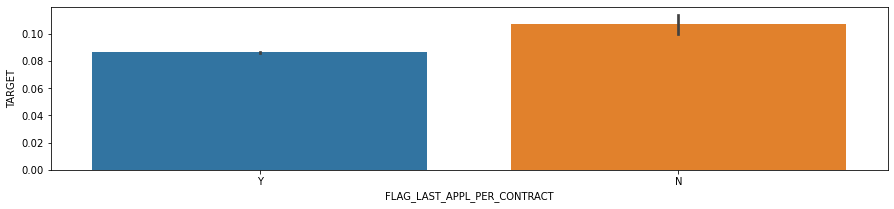

In [171]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="FLAG_LAST_APPL_PER_CONTRACT",y="TARGET",data=prevm)

In [172]:
prevm.FLAG_LAST_APPL_PER_CONTRACT=prevm.FLAG_LAST_APPL_PER_CONTRACT.map({"Y":0,"N":1})
                                                      

In [173]:
cat_prev_app

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [174]:
prevm.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 797320
XNA                                 564369
Repairs                              19974
Other                                13361
Urgent needs                          7211
Buying a used car                     2458
Building a house or an annex          2327
Everyday expenses                     2038
Medicine                              1855
Payments on other loans               1565
Education                             1328
Journey                               1036
Purchase of electronic equipment       932
Buying a new car                       881
Wedding / gift / holiday               791
Buying a home                          697
Car repairs                            686
Furniture                              656
Buying a holiday home / land           459
Business development                   358
Gasification / water supply            251
Buying a garage                        115
Hobby                                   45
Money for a

<AxesSubplot:xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='TARGET'>

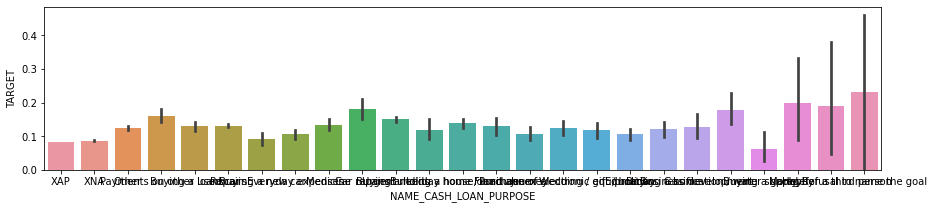

In [175]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_CASH_LOAN_PURPOSE",y="TARGET",data=prevm)

In [176]:
cash_loan_purpose=pd.get_dummies(prevm.NAME_CASH_LOAN_PURPOSE,drop_first=True)
cash_loan_purpose

,Business development,Buying a garage,Buying a holiday home / land,Buying a home,Buying a new car,Buying a used car,Car repairs,Education,Everyday expenses,Furniture,...,Money for a third person,Other,Payments on other loans,Purchase of electronic equipment,Refusal to name the goal,Repairs,Urgent needs,Wedding / gift / holiday,XAP,XNA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1420743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1420744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1420745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [177]:
prevm.drop("NAME_CASH_LOAN_PURPOSE",axis=1,inplace=True)

In [178]:
prevm.NAME_CONTRACT_STATUS.value_counts()

Approved        896287
Canceled        258008
Refused         243822
Unused offer     22630
Name: NAME_CONTRACT_STATUS, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='TARGET'>

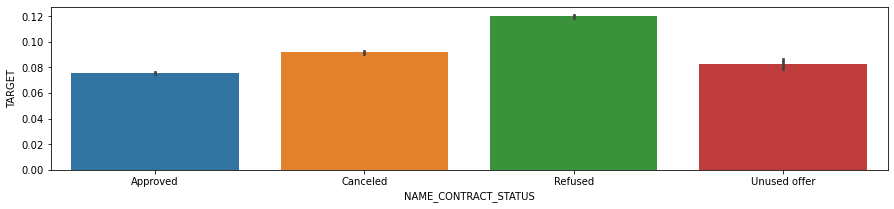

In [179]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_CONTRACT_STATUS",y="TARGET",data=prevm)

In [180]:
prevm.NAME_CONTRACT_STATUS=prevm.NAME_CONTRACT_STATUS.map({"Approved":0,"Unused offer":1,
                                                          "Canceled":2,"Refused":3})

In [181]:
prevm.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        892698
XNA                                          520045
Non-cash from your account                     7067
Cashless from the account of the employer       937
Name: NAME_PAYMENT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_PAYMENT_TYPE', ylabel='TARGET'>

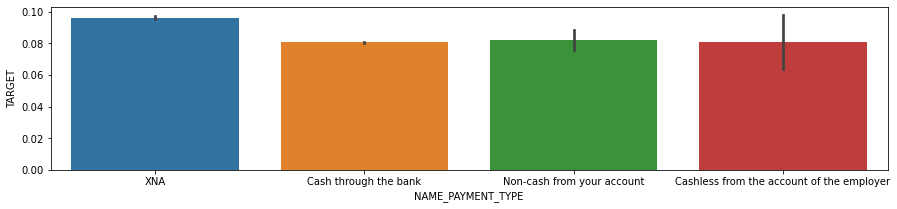

In [182]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_PAYMENT_TYPE",y="TARGET",data=prevm)

In [183]:
prevm.NAME_PAYMENT_TYPE=prevm.NAME_PAYMENT_TYPE.map({"Cash through the bank":0,
                                                     "Non-cash from your account":1,
                                                    "Cashless from the account of the employer":2,
                                                     "XNA":3})

In [184]:
prevm.CODE_REJECT_REASON.value_counts()

XAP       1154288
HC         145076
LIMIT       47441
SCO         32430
CLIENT      22630
SCOFR       10802
XNA          4351
VERIF        3060
SYSTEM        669
Name: CODE_REJECT_REASON, dtype: int64

<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='TARGET'>

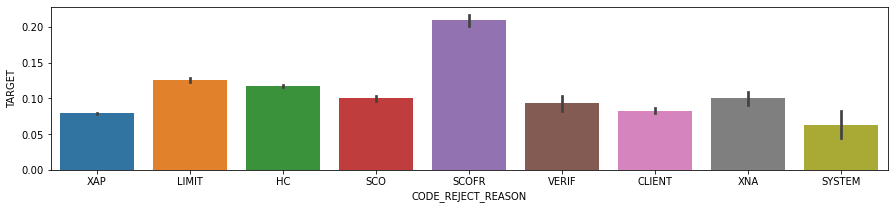

In [185]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="CODE_REJECT_REASON",y="TARGET",data=prevm)

In [186]:
prevm.CODE_REJECT_REASON=prevm.CODE_REJECT_REASON.map({"SYSTEM":0,"XAP":1,
                                                          "CLIENT":2,"VERIF":3,
                                                      "XNA":4,"SCO":5,"HC":6,"LIMIT":7,
                                                      "SCOFR":8})

In [187]:
prevm.NAME_TYPE_SUITE.value_counts()

Unaccompanied      1131075
Family              180827
Spouse, partner      57231
Children             26954
Other_B              14974
Other_A               7769
Group of people       1917
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='TARGET'>

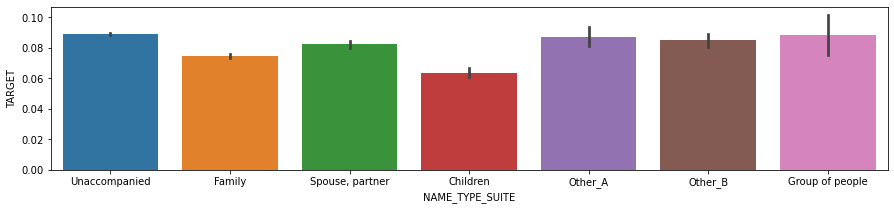

In [188]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_TYPE_SUITE",y="TARGET",data=prevm)

In [189]:
prevm.NAME_TYPE_SUITE=prevm.NAME_TYPE_SUITE.map({"Children":0,"Family":1,
                                                 "Other_B":2,"Other_A":3,
                                                "Group of people":4,"Spouse, partner":5,
                                                 "Unaccompanied":6})

In [190]:
cat_prev_app

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [191]:
prevm.NAME_CLIENT_TYPE.value_counts()

Repeater     1047532
New           257536
Refreshed     114147
XNA             1532
Name: NAME_CLIENT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='TARGET'>

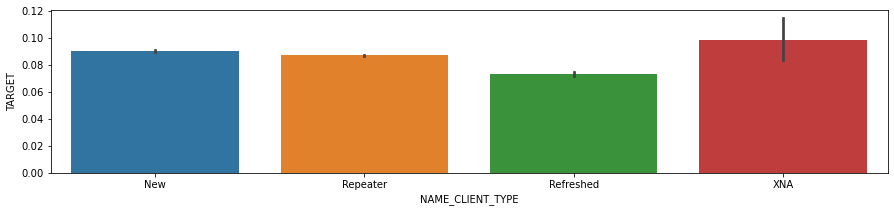

In [192]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_CLIENT_TYPE",y="TARGET",data=prevm)

In [193]:
prevm.NAME_CLIENT_TYPE=prevm.NAME_CLIENT_TYPE.map({"Refreshed":0,"Repeater":1,
                                                    "New":2,"XNA":3})

In [194]:
prevm.NAME_GOODS_CATEGORY.value_counts()

XNA                         808577
Mobile                      192420
Consumer Electronics        104057
Computers                    89282
Audio/Video                  84956
Furniture                    45077
Photo / Cinema Equipment     21568
Construction Materials       21201
Clothing and Accessories     19426
Auto Accessories              6196
Jewelry                       5147
Homewares                     4281
Medical Supplies              3200
Vehicles                      2835
Sport and Leisure             2522
Other                         2322
Gardening                     2303
Office Appliances             1966
Tourism                       1311
Medicine                      1286
Direct Sales                   328
Fitness                        165
Additional Service             108
Education                       89
Weapon                          65
Insurance                       58
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [195]:
goods_category=pd.get_dummies(prev.NAME_GOODS_CATEGORY,drop_first=True)
goods_category

,Animals,Audio/Video,Auto Accessories,Clothing and Accessories,Computers,Construction Materials,Consumer Electronics,Direct Sales,Education,Fitness,...,Medicine,Mobile,Office Appliances,Other,Photo / Cinema Equipment,Sport and Leisure,Tourism,Vehicles,Weapon,XNA
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670211,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [196]:
prevm.NAME_PORTFOLIO.value_counts()

POS      603920
Cash     389614
XNA      305468
Cards    121366
Cars        379
Name: NAME_PORTFOLIO, dtype: int64

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='TARGET'>

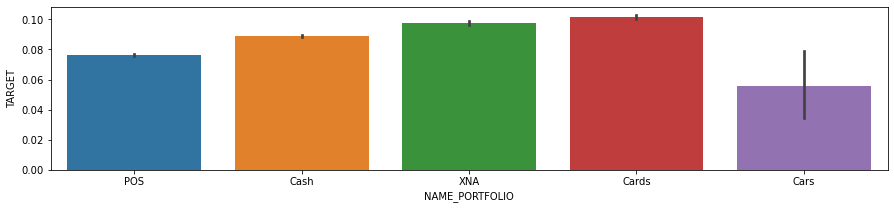

In [197]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_PORTFOLIO",y="TARGET",data=prevm)

In [198]:
prevm.NAME_PORTFOLIO=prevm.NAME_PORTFOLIO.map({"Cars":0,"POS":1,
                                                "Cash":2,"XNA":3,
                                                "Cards":4})

In [199]:
prevm.NAME_PRODUCT_TYPE.value_counts()

XNA        909767
x-sell     383495
walk-in    127485
Name: NAME_PRODUCT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_PRODUCT_TYPE', ylabel='TARGET'>

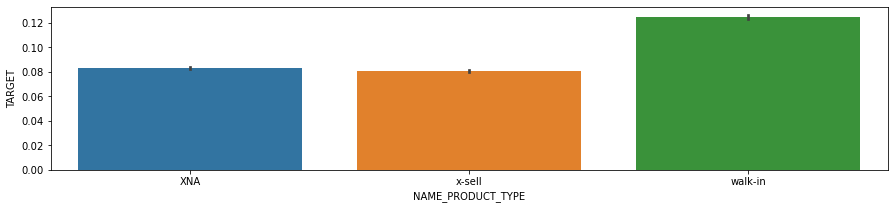

In [200]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_PRODUCT_TYPE",y="TARGET",data=prevm)

In [201]:
prevm.NAME_PRODUCT_TYPE=prevm.NAME_PRODUCT_TYPE.map({"x-sell":0,"XNA":1,
                                                          "walk-in":2})

In [202]:
prevm.CHANNEL_TYPE.value_counts()

Credit and cash offices       612803
Country-wide                  420196
Stone                         182236
Regional / Local               91891
Contact center                 58561
AP+ (Cash loan)                49321
Channel of corporate sales      5336
Car dealer                       403
Name: CHANNEL_TYPE, dtype: int64

<AxesSubplot:xlabel='CHANNEL_TYPE', ylabel='TARGET'>

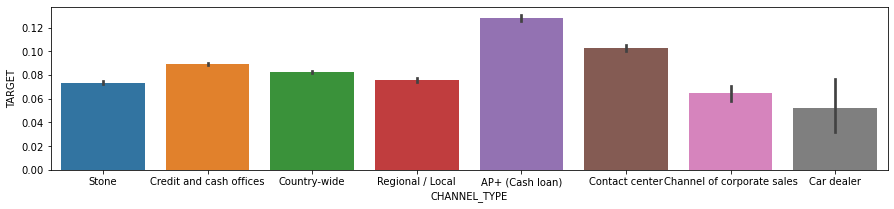

In [203]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="CHANNEL_TYPE",y="TARGET",data=prevm)

In [204]:
prevm.CHANNEL_TYPE=prevm.CHANNEL_TYPE.map({"Car dealer":0,"Channel of corporate sales":1,
                                         "Stone":2,"Regional / Local":3,"Country-wide":4,
                                          "Credit and cash offices":5,"Contact center":6,
                                          "AP+ (Cash loan)":7})

In [205]:
prevm.NAME_SELLER_INDUSTRY.value_counts()

XNA                     727076
Consumer electronics    339492
Connectivity            236763
Furniture                48601
Construction             25226
Clothing                 19733
Industry                 16431
Auto technology           4055
Jewelry                   2089
MLM partners               912
Tourism                    369
Name: NAME_SELLER_INDUSTRY, dtype: int64

<AxesSubplot:xlabel='NAME_SELLER_INDUSTRY', ylabel='TARGET'>

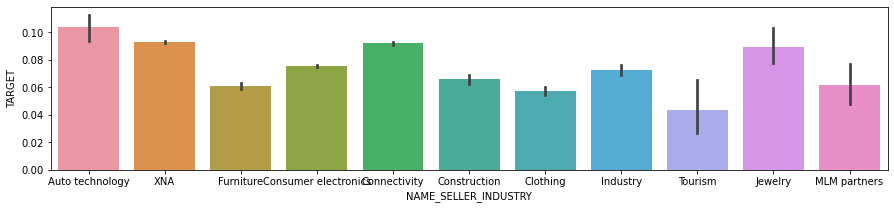

In [206]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_SELLER_INDUSTRY",y="TARGET",data=prevm)

In [207]:
prevm.NAME_SELLER_INDUSTRY=prevm.NAME_SELLER_INDUSTRY.map({"Tourism":0,"Clothing":1,
                                         "Furniture":2,"MLM partners":3,"Construction":4,
                                          "Industry":5,"Consumer electronics":6,
                                          "Connectivity":7,"Jewelry":8,"XNA":9,
                                         "Auto technology":10})

In [208]:
prevm.NAME_YIELD_GROUP.value_counts()

XNA           442458
middle        322956
high          304217
low_normal    273112
low_action     78004
Name: NAME_YIELD_GROUP, dtype: int64

<AxesSubplot:xlabel='NAME_YIELD_GROUP', ylabel='TARGET'>

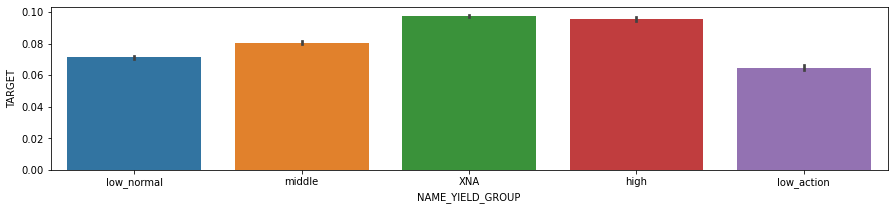

In [209]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,3)
sns.barplot(x="NAME_YIELD_GROUP",y="TARGET",data=prevm)

In [210]:
prevm.NAME_YIELD_GROUP=prevm.NAME_YIELD_GROUP.map({"low_action":0,"low_normal":1,
                                         "middle":2,"high":3,"XNA":4})

In [211]:
cat_prev_app

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [212]:
prevm.PRODUCT_COMBINATION.value_counts()

Cash                              249747
POS household with interest       224955
POS mobile with interest          189576
Cash X-Sell: middle               119411
Cash X-Sell: low                  110030
Card Street                        94078
POS industry with interest         82851
POS household without interest     71001
Card X-Sell                        66433
Cash Street: high                  51431
Cash X-Sell: high                  50568
Cash Street: middle                29779
Cash Street: low                   28395
POS other with interest            20156
POS mobile without interest        19723
POS industry without interest      10538
POS others without interest         2075
Name: PRODUCT_COMBINATION, dtype: int64

In [213]:
product_combination=pd.get_dummies(prevm.PRODUCT_COMBINATION,drop_first=True)

In [214]:
product_combination

,Card X-Sell,Cash,Cash Street: high,Cash Street: low,Cash Street: middle,Cash X-Sell: high,Cash X-Sell: low,Cash X-Sell: middle,POS household with interest,POS household without interest,POS industry with interest,POS industry without interest,POS mobile with interest,POS mobile without interest,POS other with interest,POS others without interest
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420742,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1420743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1420744,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1420745,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [215]:
prevm.drop(["PRODUCT_COMBINATION","NAME_GOODS_CATEGORY"],axis=1,inplace=True)

In [216]:
cat=[feature for feature in prevm.columns if prevm[feature].dtype=="O"]
len(cat)

0

In [232]:
prev.shape

(1670214, 37)

In [233]:
home.shape

(1670214, 99)

# Bureau

In [3]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [7]:
print("-"*90)
print("Loading the deatials....")
print("-"*90)
print(f"The shape of Bureau : {bureau.shape}")
print("-"*90)
print(f"Number of duplicated files are: {bureau.shape[0]-bureau.duplicated().shape[0]}")
print("-"*90)   

------------------------------------------------------------------------------------------
Loading the deatials....
------------------------------------------------------------------------------------------
The shape of Bureau : (1716428, 17)
------------------------------------------------------------------------------------------
Number of duplicated files are: 0
------------------------------------------------------------------------------------------


In [5]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [6]:
bu_m=pd.merge(app[["SK_ID_CURR","TARGET"]],bureau,how="left",on=["SK_ID_CURR"])

In [8]:
bu_m.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_BUREAU', 'CREDIT_ACTIVE',
       'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'],
      dtype='object')

In [9]:
bu_m.shape

(1509345, 18)

In [10]:
num_bu_m=[feature for feature in bu_m.columns if bu_m[feature].dtype!="O"]
len(num_bu_m)

15

In [12]:
cat_bu_m=[feature for feature in bu_m.columns if bu_m[feature].dtype=="O"]
len(cat_bu_m)

3

In [13]:
cat_bu_m

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

In [14]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [21]:
startbudays=bu_m.columns.get_loc("DAYS_CREDIT")
endbudays=bu_m.columns.get_loc("DAYS_ENDDATE_FACT")


b_days=bureau.iloc[:,startbudays:endbudays+1]

<AxesSubplot:>

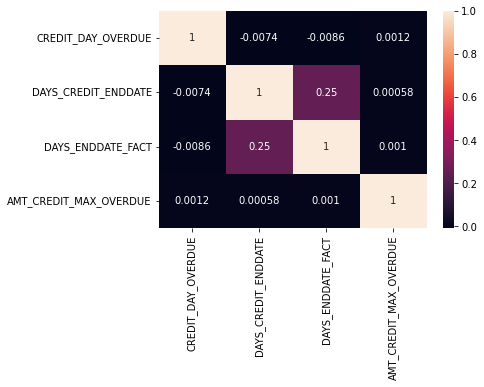

In [22]:
sns.heatmap(b_days.corr(),annot=True)

<AxesSubplot:xlabel='DAYS_CREDIT', ylabel='Count'>

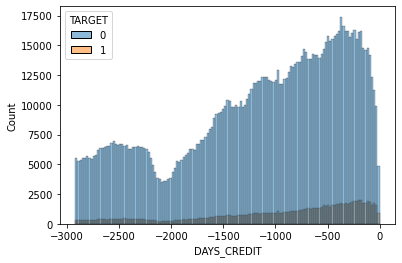

In [4]:
 sns.histplot(x=bu_m.DAYS_CREDIT.dropna(axis=0)
                        ,hue=bu_m.TARGET)

<AxesSubplot:xlabel='CREDIT_DAY_OVERDUE', ylabel='Count'>

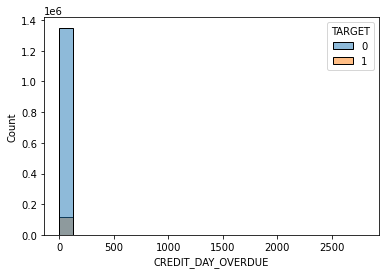

In [6]:
 sns.histplot(x=bu_m.CREDIT_DAY_OVERDUE.dropna(axis=0)
                        ,hue=bu_m.TARGET)

<AxesSubplot:xlabel='DAYS_CREDIT_ENDDATE', ylabel='Count'>

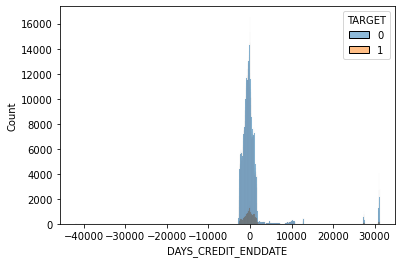

In [7]:
 sns.histplot(x=bu_m.DAYS_CREDIT_ENDDATE.dropna(axis=0)
                        ,hue=bu_m.TARGET)

In [ ]:
 sns.histplot(x=bu_m.DAYS_CREDIT_ENDDATE.dropna(axis=0)
                        ,hue=bu_m.TARGET)

<AxesSubplot:xlabel='DAYS_ENDDATE_FACT', ylabel='Count'>

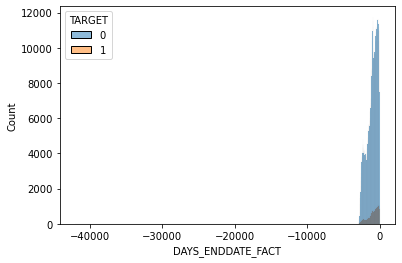

In [8]:
 sns.histplot(x=bu_m.DAYS_ENDDATE_FACT.dropna(axis=0)
                        ,hue=bu_m.TARGET)

<AxesSubplot:xlabel='DAYS_CREDIT_UPDATE', ylabel='Count'>

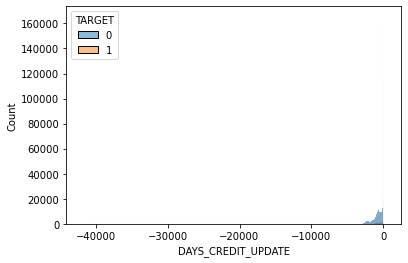

In [9]:
 sns.histplot(x=bu_m.DAYS_CREDIT_UPDATE.dropna(axis=0)
                        ,hue=bu_m.TARGET)

In [19]:
startbuamt=bu_m.columns.get_loc("AMT_CREDIT_MAX_OVERDUE")
endbuamt=bu_m.columns.get_loc("AMT_CREDIT_SUM_OVERDUE")


b_amt=bureau.iloc[:,startbuamt:endbuamt+1]

<AxesSubplot:>

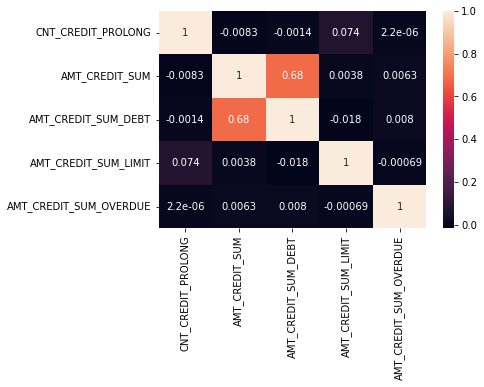

In [20]:
sns.heatmap(b_amt.corr(),annot=True)

<AxesSubplot:xlabel='CNT_CREDIT_PROLONG', ylabel='Count'>

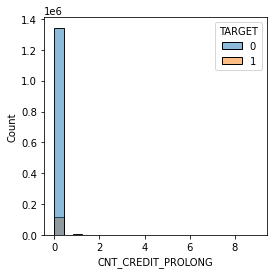

In [32]:
 sns.histplot(x=bu_m.CNT_CREDIT_PROLONG.dropna(axis=0)
                        ,hue=bu_m.TARGET)

In [33]:
b_amt.columns

Index(['CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE'],
      dtype='object')

<AxesSubplot:xlabel='CREDIT_ACTIVE', ylabel='TARGET'>

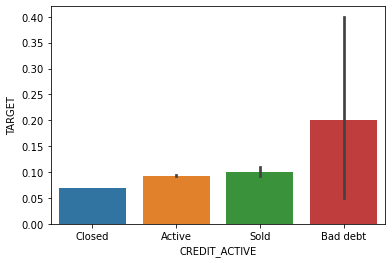

In [10]:
sns.barplot(x=bu_m.CREDIT_ACTIVE,y=bu_m.TARGET)

<AxesSubplot:xlabel='CREDIT_CURRENCY', ylabel='TARGET'>

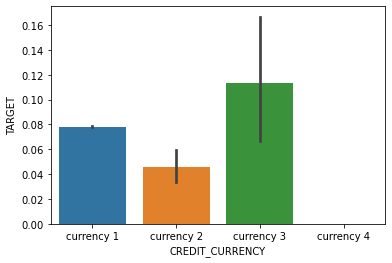

In [11]:
sns.barplot(x=bu_m.CREDIT_CURRENCY,y=bu_m.TARGET)

<AxesSubplot:xlabel='CREDIT_TYPE', ylabel='TARGET'>

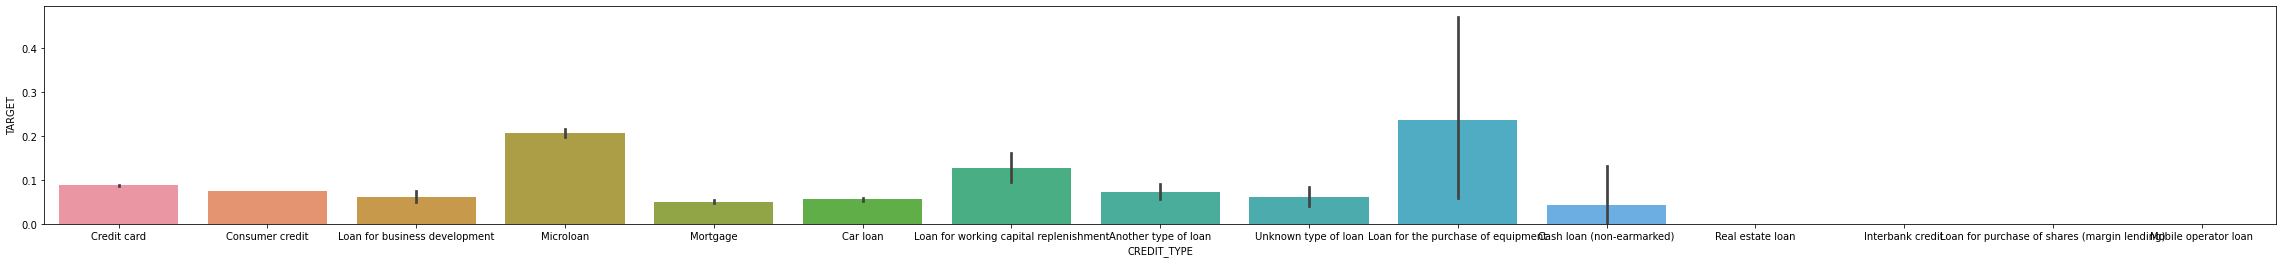

In [17]:
plt.figure(figsize=(40,4))
sns.barplot(x=bu_m.CREDIT_TYPE,y=bu_m.TARGET)

## Bureau Balance

In [3]:
print("-"*90)
print("Loading the deatials....")
print("-"*90)
print(f"The shape of Bureau Balance: {bureau_bal.shape}")
print("-"*90)
print(f"Number of duplicated files are: {bureau_bal.shape[0]-bureau_bal.duplicated().shape[0]}")
print("-"*90)

------------------------------------------------------------------------------------------
Loading the deatials....
------------------------------------------------------------------------------------------
The shape of Bureau Balance: (27299925, 3)
------------------------------------------------------------------------------------------
Number of duplicated files are: 0
------------------------------------------------------------------------------------------


In [19]:
bureau_bal.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [7]:
bu_bal_m=pd.merge(bu_m[["SK_ID_BUREAU","TARGET"]],bureau_bal,how="left",on=["SK_ID_BUREAU"])

In [8]:
bu_bal_m.columns

Index(['SK_ID_BUREAU', 'TARGET', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [12]:
bu_bal_m.MONTHS_BALANCE.value_counts()

0.0    4003739
1.0    3282725
2.0    2555182
3.0    1876072
4.0    1281482
5.0     877248
6.0     616533
7.0     208564
8.0         67
Name: MONTHS_BALANCE, dtype: int64

In [10]:
bu_bal_m.MONTHS_BALANCE=np.abs(bu_bal_m.MONTHS_BALANCE)

In [11]:
bu_bal_m.MONTHS_BALANCE=bu_bal_m.MONTHS_BALANCE//12

<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='Count'>

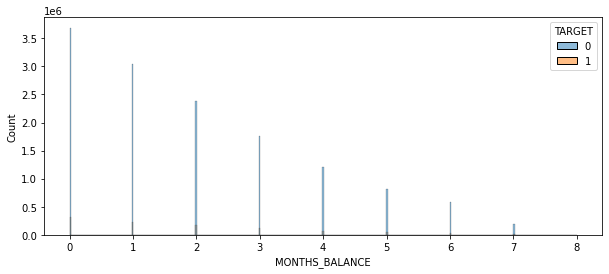

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(x=bu_bal_m.MONTHS_BALANCE.dropna(axis=0),hue=bu_bal_m.TARGET)

<AxesSubplot:xlabel='STATUS', ylabel='TARGET'>

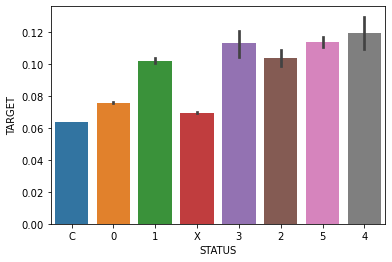

In [15]:
sns.barplot(x="STATUS",y="TARGET",data=bu_bal_m)

## Credit Balance

In [17]:
print("-"*90)
print("Loading the deatials....")
print("-"*90)
print(f"The shape of Credit Balance: {credit.shape}")
print("-"*90)
print(f"Number of duplicated files are: {credit.shape[0]-credit.duplicated().shape[0]}")
print("-"*90)

------------------------------------------------------------------------------------------
Loading the deatials....
------------------------------------------------------------------------------------------
The shape of Credit Balance: (3840312, 23)
------------------------------------------------------------------------------------------
Number of duplicated files are: 0
------------------------------------------------------------------------------------------


<AxesSubplot:>

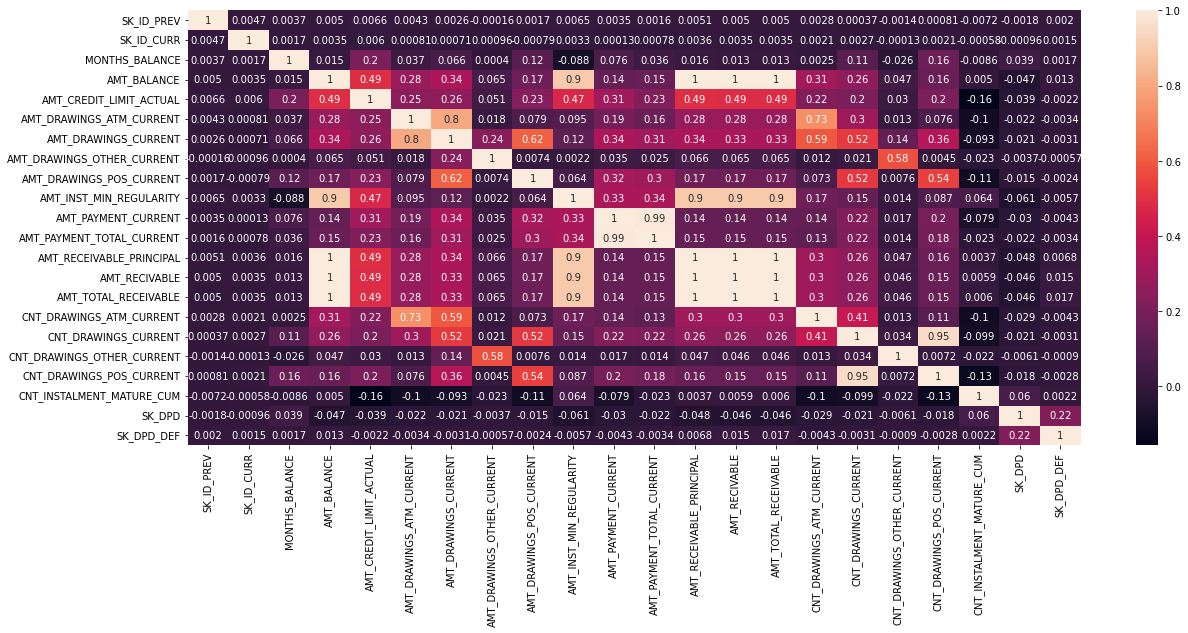

In [44]:
plt.figure(figsize=(20,8))
sns.heatmap(credit.corr(),annot=True)

In [18]:
num_credit=[feature for feature in credit.columns if credit[feature].dtype!="O"]
len(num_credit)

22

In [21]:
num_credit

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'SK_DPD',
 'SK_DPD_DEF']

In [19]:
cat_credit=[feature for feature in credit.columns if credit[feature].dtype=="O"]
len(cat_credit)

1

In [20]:
cat_credit

['NAME_CONTRACT_STATUS']

In [24]:
credit_m=pd.merge(app[['SK_ID_CURR', 'TARGET']],credit,on=["SK_ID_CURR"],how="left")

In [25]:
credit_m.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [28]:
startcamt=credit_m.columns.get_loc("MONTHS_BALANCE")
endcamt=credit_m.columns.get_loc("AMT_TOTAL_RECEIVABLE")


c_amt=credit_m.iloc[:,startcamt:endcamt+1]

<AxesSubplot:>

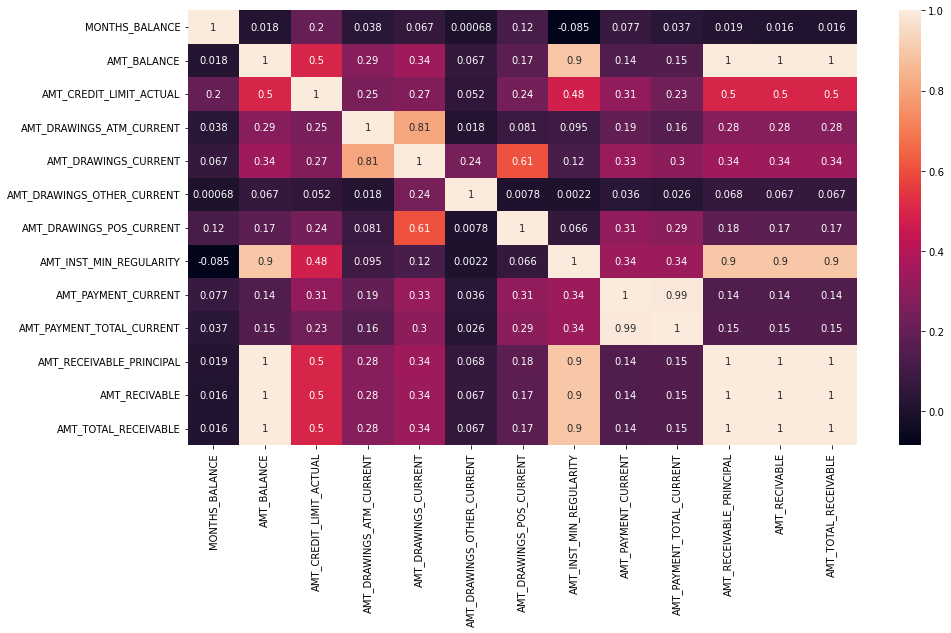

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(c_amt.corr(),annot=True)

In [32]:
startct=credit_m.columns.get_loc("CNT_DRAWINGS_ATM_CURRENT")
endct=credit_m.columns.get_loc("CNT_INSTALMENT_MATURE_CUM")


c_cnt=credit_m.iloc[:,startct:endct+1]

<AxesSubplot:>

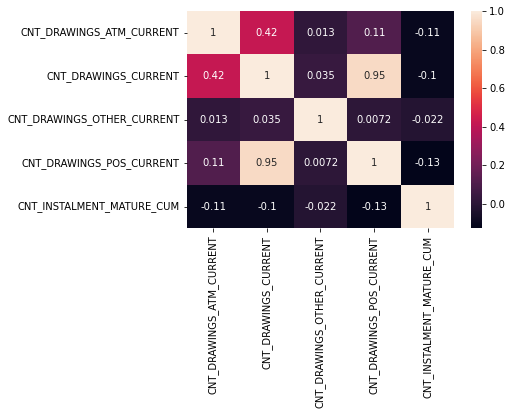

In [33]:
sns.heatmap(c_cnt.corr(),annot=True)

<AxesSubplot:xlabel='CNT_DRAWINGS_ATM_CURRENT', ylabel='Count'>

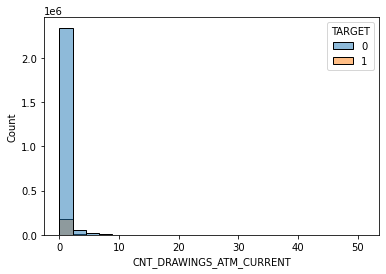

In [36]:
sns.histplot(x="CNT_DRAWINGS_ATM_CURRENT",hue="TARGET",data=credit_m)

<AxesSubplot:xlabel='CNT_DRAWINGS_CURRENT', ylabel='Count'>

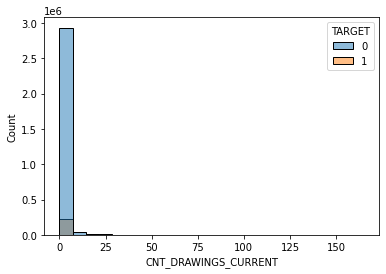

In [37]:
sns.histplot(x="CNT_DRAWINGS_CURRENT",hue="TARGET",data=credit_m)

<AxesSubplot:xlabel='CNT_DRAWINGS_OTHER_CURRENT', ylabel='Count'>

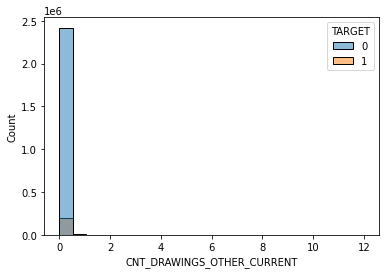

In [38]:
sns.histplot(x="CNT_DRAWINGS_OTHER_CURRENT",hue="TARGET",data=credit_m)

<AxesSubplot:xlabel='CNT_INSTALMENT_MATURE_CUM', ylabel='Count'>

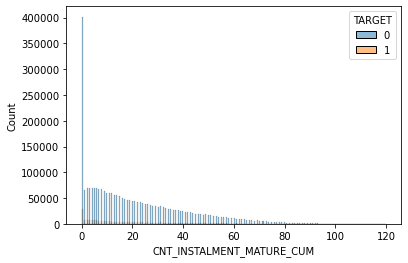

In [39]:
sns.histplot(x="CNT_INSTALMENT_MATURE_CUM",hue="TARGET",data=credit_m)

<AxesSubplot:xlabel='SK_DPD', ylabel='Count'>

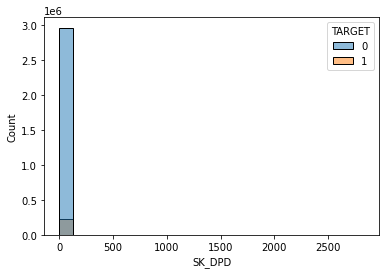

In [40]:
sns.histplot(x="SK_DPD",hue="TARGET",data=credit_m)

<AxesSubplot:xlabel='SK_DPD_DEF', ylabel='Count'>

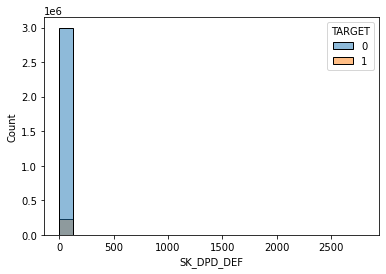

In [41]:
sns.histplot(x="SK_DPD_DEF",hue="TARGET",data=credit_m)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='TARGET'>

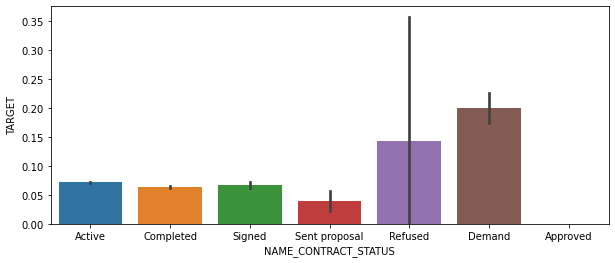

In [46]:
plt.figure(figsize=(10,4))
sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data=credit_m)

## Install Payment

In [47]:
print("-"*90)
print("Loading the deatials....")
print("-"*90)
print(f"The shape of Installment Payment: {install.shape}")
print("-"*90)
print(f"Number of duplicated files are: {install.shape[0]-install.duplicated().shape[0]}")
print("-"*90)  

------------------------------------------------------------------------------------------
Loading the deatials....
------------------------------------------------------------------------------------------
The shape of Installment Payment: (13605401, 8)
------------------------------------------------------------------------------------------
Number of duplicated files are: 0
------------------------------------------------------------------------------------------


In [48]:
install_num=[feature for feature in install.columns if install[feature].dtype!="O"]
len(install_num)

8

<AxesSubplot:>

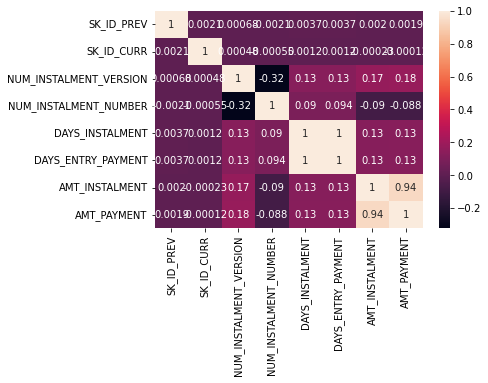

In [49]:
sns.heatmap(install.corr(),annot=True)

In [50]:
install.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [52]:
install_m=pd.merge(app[['SK_ID_CURR','TARGET']],install,on=['SK_ID_CURR'],how="left")

<AxesSubplot:xlabel='NUM_INSTALMENT_VERSION', ylabel='Count'>

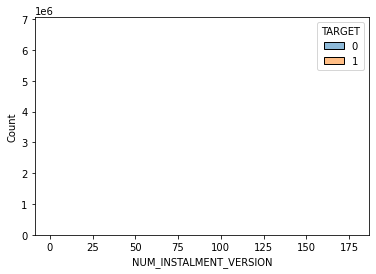

In [56]:
sns.histplot(x='NUM_INSTALMENT_VERSION',hue='TARGET',data=install_m)

<AxesSubplot:xlabel='NUM_INSTALMENT_NUMBER', ylabel='Count'>

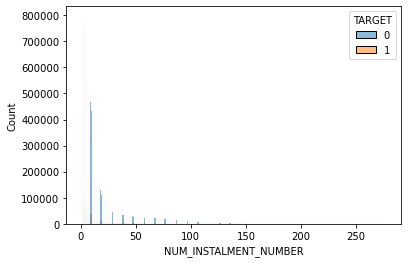

In [57]:
sns.histplot(x='NUM_INSTALMENT_NUMBER',hue='TARGET',data=install_m)

<AxesSubplot:xlabel='DAYS_INSTALMENT', ylabel='Count'>

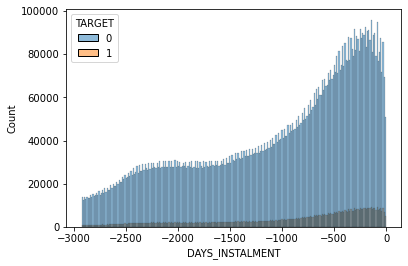

In [58]:
sns.histplot(x='DAYS_INSTALMENT',hue='TARGET',data=install_m)

<AxesSubplot:xlabel='DAYS_ENTRY_PAYMENT', ylabel='Count'>

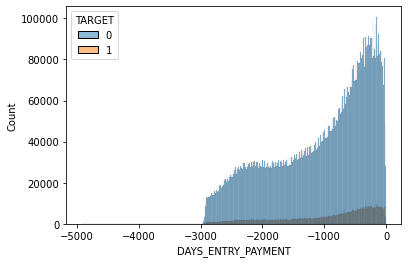

In [59]:
sns.histplot(x='DAYS_ENTRY_PAYMENT',hue='TARGET',data=install_m)

<AxesSubplot:xlabel='AMT_INSTALMENT', ylabel='Count'>

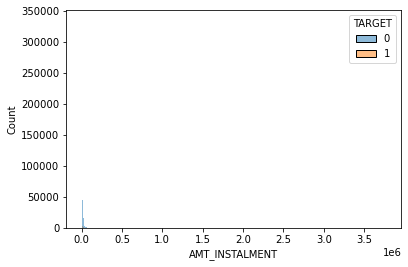

In [60]:
sns.histplot(x='AMT_INSTALMENT',hue='TARGET',data=install_m)

## POS Cash

In [61]:
print("-"*90)
print("Loading the deatials....")
print("-"*90)
print(f"The shape of POS Cash: {pos.shape}")
print("-"*90)
print(f"Number of duplicated files are: {pos.shape[0]-pos.duplicated().shape[0]}")
print("-"*90)  

------------------------------------------------------------------------------------------
Loading the deatials....
------------------------------------------------------------------------------------------
The shape of POS Cash: (10001358, 8)
------------------------------------------------------------------------------------------
Number of duplicated files are: 0
------------------------------------------------------------------------------------------


In [62]:
pos_num=[feature for feature in pos.columns if pos[feature].dtype!="O"]
len(pos_num)

7

In [65]:
pos_num

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD',
 'SK_DPD_DEF']

In [63]:
pos_cat=[feature for feature in pos.columns if pos[feature].dtype=="O"]
len(pos_cat)

1

In [64]:
pos_cat

['NAME_CONTRACT_STATUS']

<AxesSubplot:>

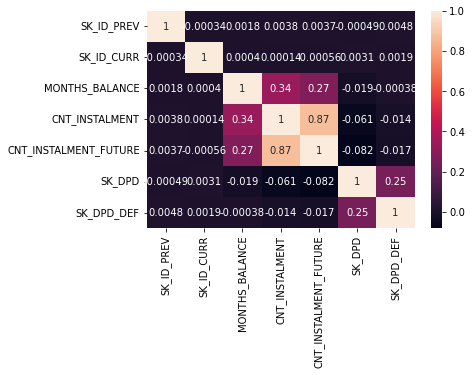

In [66]:
sns.heatmap(pos.corr(),annot=True)

In [67]:
pos_m=pd.merge(app[['SK_ID_CURR','TARGET']],pos,on=['SK_ID_CURR'],how="left")

<AxesSubplot:xlabel='CNT_INSTALMENT', ylabel='Count'>

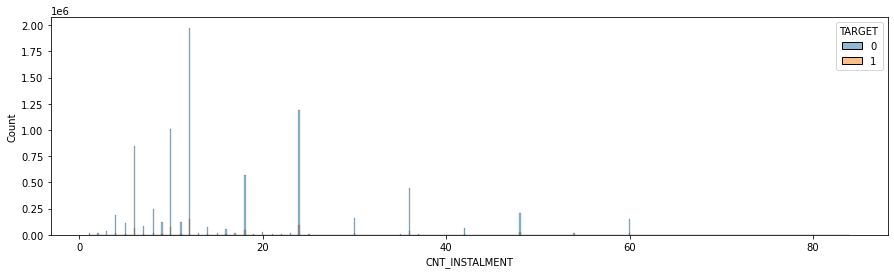

In [72]:
plt.figure(figsize=(15,4))
sns.histplot(x='CNT_INSTALMENT',hue='TARGET',data=pos_m)

<AxesSubplot:xlabel='CNT_INSTALMENT_FUTURE', ylabel='Count'>

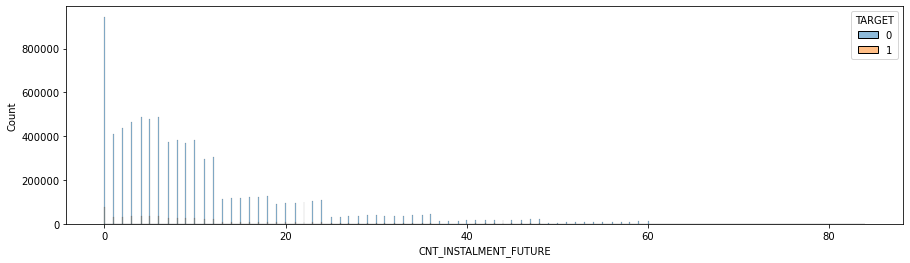

In [71]:
plt.figure(figsize=(15,4))
sns.histplot(x='CNT_INSTALMENT_FUTURE',hue='TARGET',data=pos_m)


<AxesSubplot:xlabel='SK_DPD', ylabel='Count'>

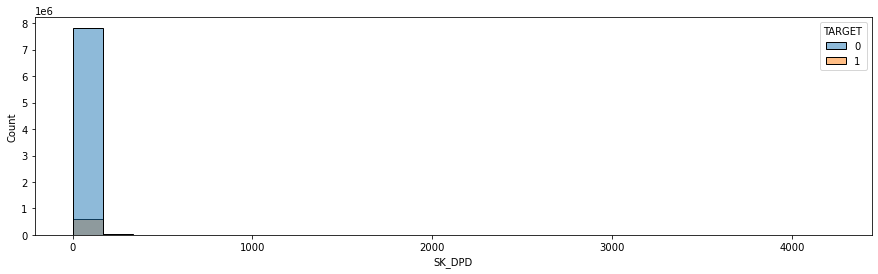

In [73]:
plt.figure(figsize=(15,4))
sns.histplot(x='SK_DPD',hue='TARGET',data=pos_m)

<AxesSubplot:xlabel='SK_DPD_DEF', ylabel='Count'>

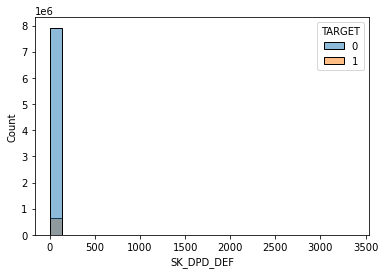

In [74]:
sns.histplot(x='SK_DPD_DEF',hue='TARGET',data=pos_m)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='TARGET'>

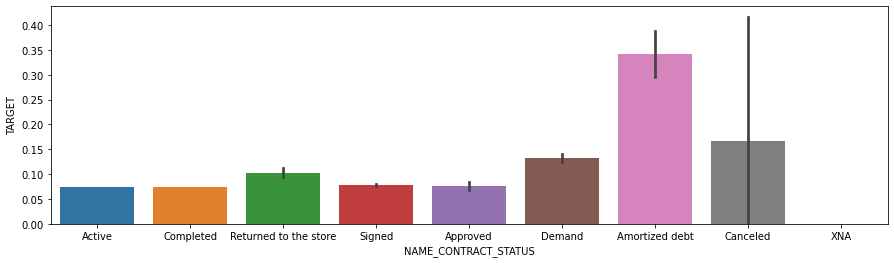

In [76]:
plt.figure(figsize=(15,4))
sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data=pos_m)